# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей. 

In [1]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [3]:
df = pd.read_csv('/Users/ignatsalnikov/Downloads/YearPredictionMSD.txt.zip', header=None)
df

0         1         2         3         4         5         6   \
0       2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905   
1       2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
2       2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
3       2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
4       2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   
...      ...       ...       ...       ...       ...       ...       ...   
515340  2006  51.28467  45.88068  22.19582  -5.53319  -3.61835 -16.36914   
515341  2006  49.87870  37.93125  18.65987  -3.63581 -27.75665 -18.52988   
515342  2006  45.12852  12.65758 -38.72018   8.80882 -29.29985  -2.28706   
515343  2006  44.16614  32.38368  -3.34971  -2.49165 -19.59278 -18.67098   
515344  2005  51.85726  59.11655  26.39436  -5.46030 -20.69012 -19.95528   

              7         8         9   ...        81         82         83  \
0      -25.01202 -12.23257   7.83089  ...  13.01620  -54.40548   58.99367   
1        8.76630  -0.92019  18.76548  ...   5.66812  -19.68073   33.04964   
2       -3.27872  -2.35035  16.07017  ...   3.03800   26.05866  -50.92779   
3        5.05097 -10.34124   3.55005  ...  34.57337 -171.70734  -16.96705   
4      -12.48207  -9.37636  12.63699  ...   9.92661  -55.95724   64.92712   
...          ...       ...       ...  ...       ...        ...        ...   
515340   2.12652   5.18160  -8.66890  ...   4.81440   -3.75991  -30.92584   
515341   7.76108   3.56109  -2.50351  ...  32.38589  -32.75535  -61.05473   
515342 -18.40424 -22.28726  -4.52429  ... -18.73598  -71.15954 -123.98443   
515343   8.78428   4.02039 -12.01230  ...  67.16763  282.77624   -4.63677   
515344  -6.72771   2.29590  10.31018  ... -11.50511  -69.18291   60.58456   

               84        85        86         87        88         89  \
0        15.37344   1.11144 -23.08793   68.40795  -1.82223  -27.46348   
1        42.87836  -9.90378 -32.22788   70.49388  12.04941   58.43453   
2        10.93792  -0.07568  43.20130 -115.00698  -0.05859   39.67068   
3       -46.67617 -12.51516  82.58061  -72.08993   9.90558  199.62971   
4       -17.72522  -1.49237  -7.50035   51.76631   7.88713   55.66926   
...           ...       ...       ...        ...       ...        ...   
515340   26.33968  -5.03390  21.86037 -142.29410   3.42901  -41.14721   
515341   56.65182  15.29965  95.88193  -10.63242  12.96552   92.11633   
515342  121.26989  10.89629  34.62409 -248.61020  -6.07171   53.96319   
515343  144.00125  21.62652 -29.72432   71.47198  20.32240   14.83107   
515344   28.64599  -4.39620 -64.56491  -45.61012  -5.51512   32.35602   

              90  
0        2.26327  
1       26.92061  
2       -0.66345  
3       18.85382  
4       28.74903  
...          ...  
515340 -15.46052  
515341  10.88815  
515342  -8.09364  
515343  39.74909  
515344  12.17352  

[515345 rows x 91 columns]

Посмотрим на статистики по данным.

In [4]:
df.describe()

0              1              2              3   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.387126       1.289554       8.658347   
std        10.931046       6.067558      51.580351      35.268585   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      61.970140     384.065730     322.851430   

                  4              5              6              7   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        1.164124      -6.553601      -9.521975      -2.391089   
std        16.322790      22.860785      12.857751      14.571873   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487500     -20.666450     -18.440990     -10.780600   
50%        -0.652840      -6.007770     -11.188390      -2.046670   
75%         8.787540       7.741870      -2.388960       6.508580   
max       335.771820     262.068870     166.236890     172.402680   

                  8              9   ...             81             82  \
count  515345.000000  515345.000000  ...  515345.000000  515345.000000   
mean       -1.793236       3.727876  ...      15.755406     -73.461500   
std         7.963827      10.582861  ...      32.099635     175.618889   
min       -72.503850    -126.479040  ...    -437.722030   -4402.376440   
25%        -6.468420      -2.293660  ...      -1.812650    -139.555160   
50%        -1.736450       3.822310  ...       9.171850     -53.090060   
75%         2.913450       9.961820  ...      26.274480      13.478730   
max       126.741270     146.297950  ...     840.973380    4469.454870   

                  83             84             85             86  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       41.542422      37.934119       0.315751      17.669213   
std       122.228799      95.050631      16.161764     114.427905   
min     -1810.689190   -3098.350310    -341.789120   -3168.924570   
25%       -20.986900      -4.669540      -6.781590     -31.580610   
50%        28.791060      33.623630       0.820840      15.598470   
75%        89.661770      77.785800       8.470990      67.794960   
max      3210.701700    1734.079690     260.544900    3662.065650   

                  87             88             89             90  
count  515345.000000  515345.000000  515345.000000  515345.000000  
mean      -26.315336       4.458641      20.035136       1.329105  
std       173.977336      13.346557     185.558247      22.088576  
min     -4319.992320    -236.039260   -7458.378150    -381.424430  
25%      -101.530300      -2.566090     -59.509270      -8.820210  
50%       -21.204120       3.117640       7.759730       0.053050  
75%        52.389330       9.967740      86.351610       9.679520  
max      2833.608950     463.419500    7393.398440     677.899630  

[8 rows x 91 columns]

Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

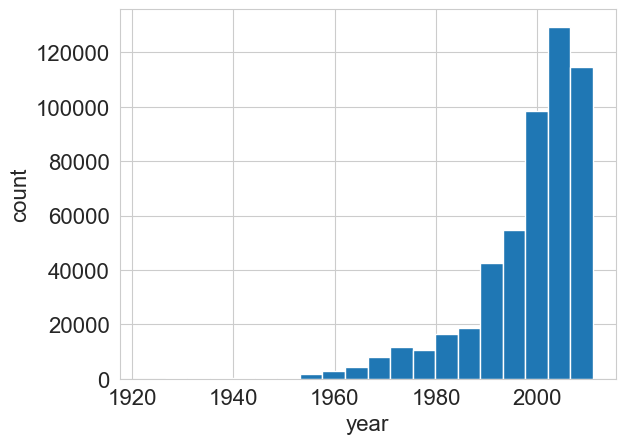

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

best_const = np.mean(y_train)
model = Ridge().fit(X_train, y_train)

In [8]:
baseline_linreg_error = mean_squared_error(y_test, model.predict(X_test))
baseline_linreg_error

89.74966397222076

In [9]:
best_const_error = mean_squared_error(y_test, best_const * np.ones_like(y_test))
best_const_error

117.62580230734426

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px
import pandas as pd

def plot_metrics(train_metrics, val_metrics):

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    ax.plot(range(1, len(val_metrics) + 1), val_metrics, label='val')
    
    min_metric_ind = np.argmin(val_metrics)
    ax.axvline(min_metric_ind + 1, color='red', linestyle='--', \
                   label=f'MSE = {val_metrics[min_metric_ind]:.2f}')
    
    if max(train_metrics) / min(train_metrics) > 10:
        ax.set_yscale('log')

    ax.set_xlabel('epoch')
    ax.legend()

    ax.set_ylabel('MSE')
    
    plt.show()

def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losse`s: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')
    
    min_metric_ind = np.argmin(val_metrics)
    axs[1].axvline(min_metric_ind + 1, color='red', linestyle='--', \
                   label=f'MSE = {val_metrics[min_metric_ind]:.2f}')
    
    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    
    plt.show()

def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    """
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []
    
    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:
            

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            model.backward(X_batch, criterion.backward(predictions, y_batch))
            optimizer.step()
            
            
            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})


        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:

            
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
                
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')
        
    return train_metrics, val_metrics

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [12]:
y_train_shifted = y_train - y_train.min()
y_val_shifted = y_val - y_train.min()

In [13]:
y_train_shifted

array([79, 74, 87, ..., 81, 55, 77])

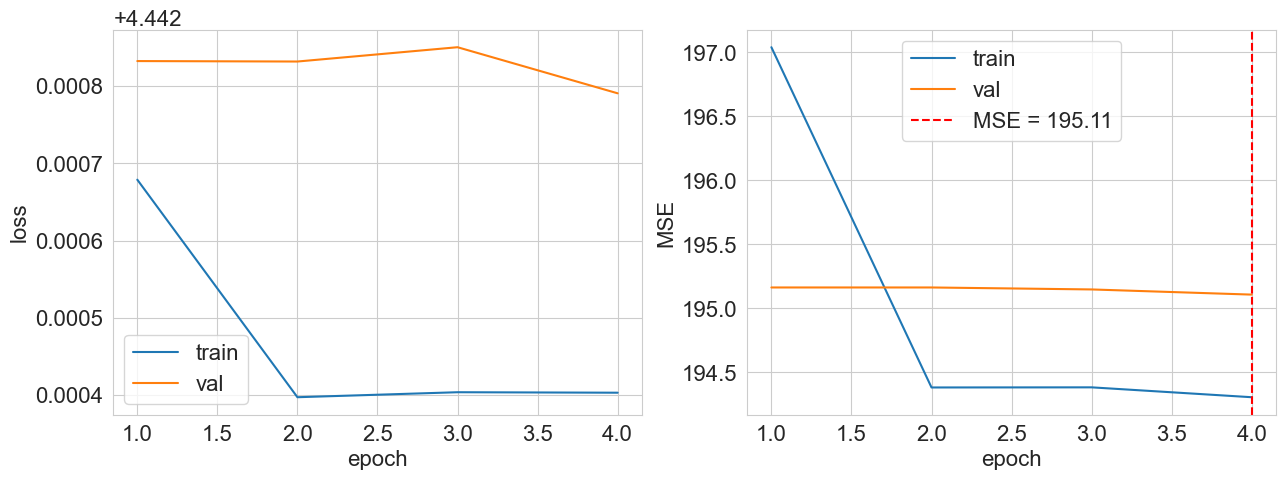

Validation MSE: 195.106


In [14]:
train_loader = mm.DataLoader(X_train, y_train_shifted, batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_shifted, batch_size=32, shuffle=False)

model = mm.Sequential(
    mm.Linear(90, 128),
    mm.ReLU(),
    mm.Linear(128, 90),
    mm.Softmax(),
)

optimizer = mm.SGD(model, lr=1e-3)
criterion = mm.CrossEntropyLoss()

def metric(x, y):
        
    labels = np.argmax(x, axis=1)    
    mse = mean_squared_error(y, labels)        
        
    return mse

out = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader, 
    num_epochs = 4
)

In [15]:
np.argmax(model(X_test), axis=1) + y_train.min()

array([2007, 2007, 2007, ..., 2007, 2007, 2007])

In [16]:
best_const

1998.3753660985026

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** 

Мы предсказываем выборочное среднее... так что очев все плохо. Почему? В задаче классификации если модель немного ошиблась (при этом уверенно) и отнесла песню 1998 года к 1999, то все плохо и лосс большой, в то же время понятно, что с точки зреняи MSE мы не должны сильно наказыват модель за ошибки в несколько лет.

В общем да, учить классификатор для некатигориального таргета - плохая идея.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

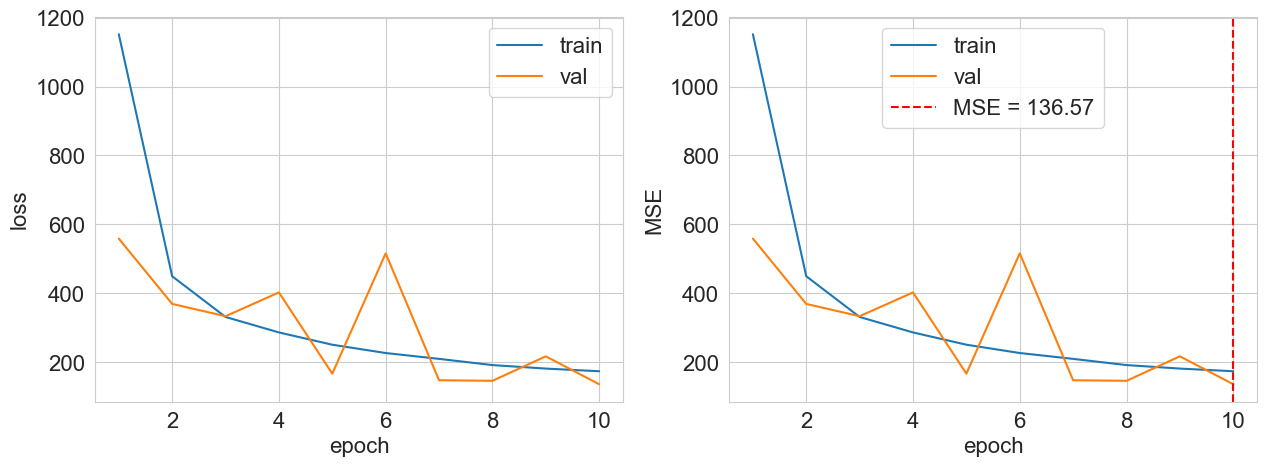

Validation MSE: 136.571


In [17]:
train_loader = mm.DataLoader(X_train, y_train_shifted.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_shifted.reshape(-1, 1), batch_size=32, shuffle=False)

model = mm.Sequential(
    mm.Linear(90, 128),
    mm.ReLU(),
    mm.Linear(128, 1)
)

optimizer = mm.SGD(model, lr=1e-6)
criterion = mm.MSELoss()

def metric(x, y):
    
    mse = mean_squared_error(y, x)

    return mse

t_mse, v_mse = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs = 10,
    verbose=True
)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** 

Сразу взорвались градиенты и везде были NaN. Даже с хорошо подобранным `lr` обучение идет нестабильно.

Классификация хуже регрессии по описанным выше причинам - наш таргет по сути не категориальный. Но тут проблемы с масштабированием данных и сходимостью - поэтому мы все еще хуже бейзлайна.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [18]:
min_y = y_train.min()
max_y = y_train.max()

In [19]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - min_y) / (max_y - min_y)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    
    return sample * (max_y - min_y) + min_y

In [20]:
assert np.allclose(y_train, denormalize(normalize(y_train)))

In [21]:
y_train_norm = normalize(y_train)
y_val_norm = normalize(y_val)

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

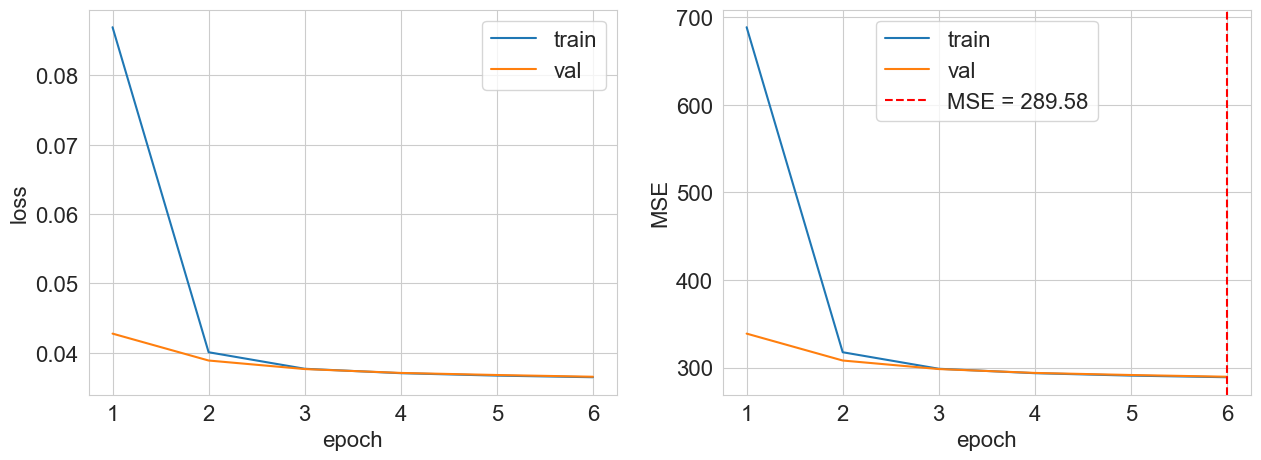

Validation MSE: 289.577


In [22]:
train_loader = mm.DataLoader(X_train, y_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

model = mm.Sequential(
    mm.Linear(90, 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

optimizer = mm.SGD(model, lr=1e-6)
criterion = mm.MSELoss()

def metric(x, y):
        
    mse = mean_squared_error(denormalize(y), denormalize(x))

    return mse

t_mse, v_mse = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs = 6,
    verbose = True
)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** 

Стало хуже с точки срения MSE, наверное все из-за того что теперь данные и целевая переменная совсем разных масштабов. Но с другой стороны обучения теперь гораздо более стабильное и мы быстрее сходимся.


**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)

X_train_norm = ss.transform(X_train)
X_val_norm = ss.transform(X_val)

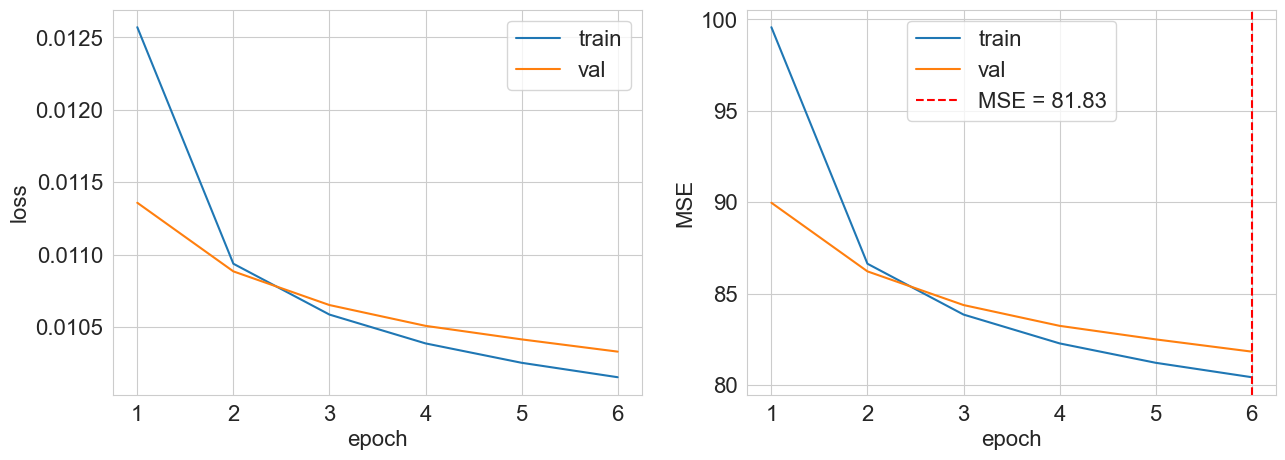

Validation MSE: 81.826


In [24]:
train_loader = mm.DataLoader(X_train_norm, y_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_norm, y_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

model = mm.Sequential(
    mm.Linear(90, 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

optimizer = mm.SGD(model, lr=0.05)
criterion = mm.MSELoss()

def metric(x, y):
        
    mse = mean_squared_error(denormalize(y), denormalize(x))

    return mse

t_mse, v_mse = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs = 6
)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

In [181]:
train_loader = mm.DataLoader(X_train_norm, y_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_norm, y_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

def metric(x, y):

    mse = mean_squared_error(denormalize(y), denormalize(x))

    return mse

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

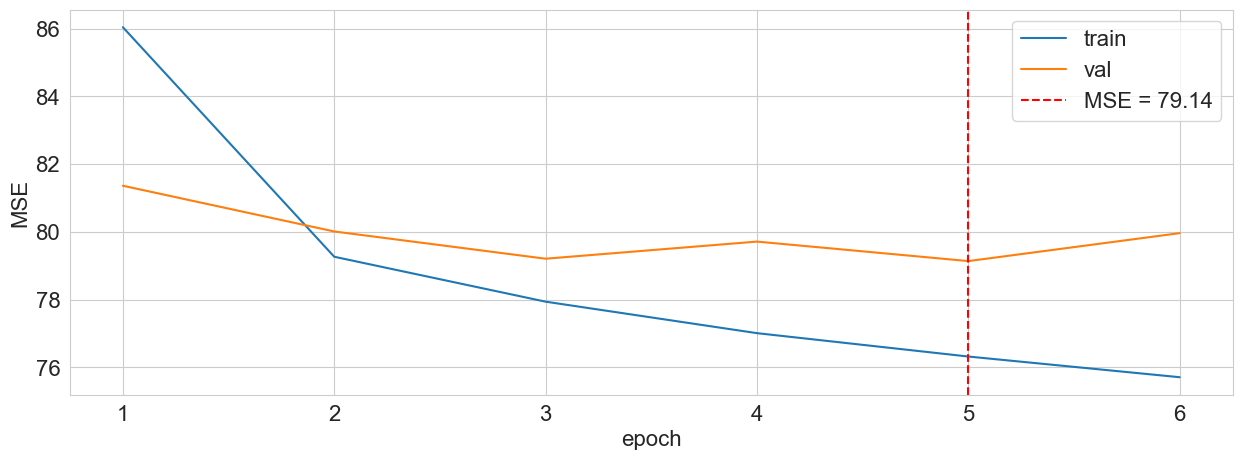

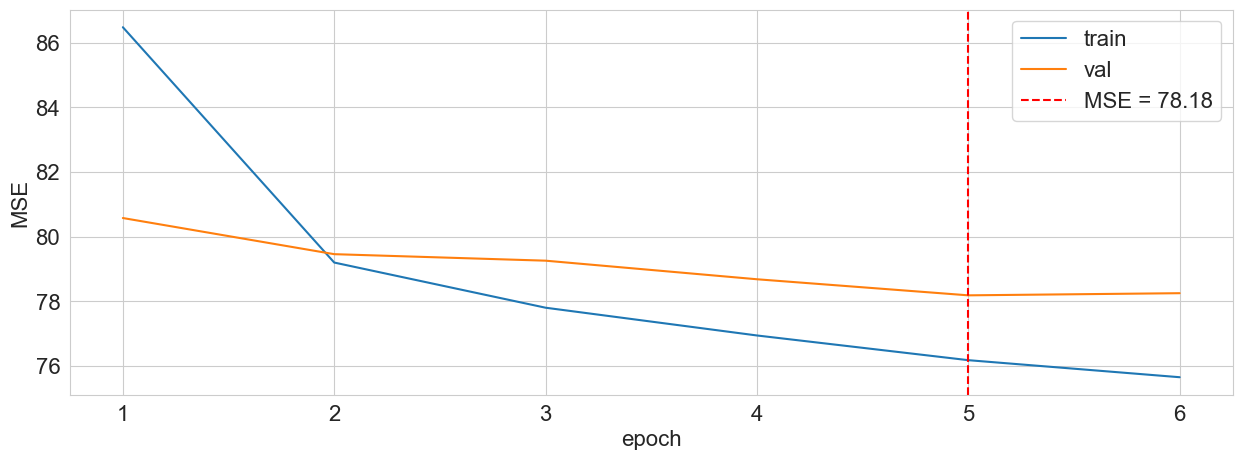

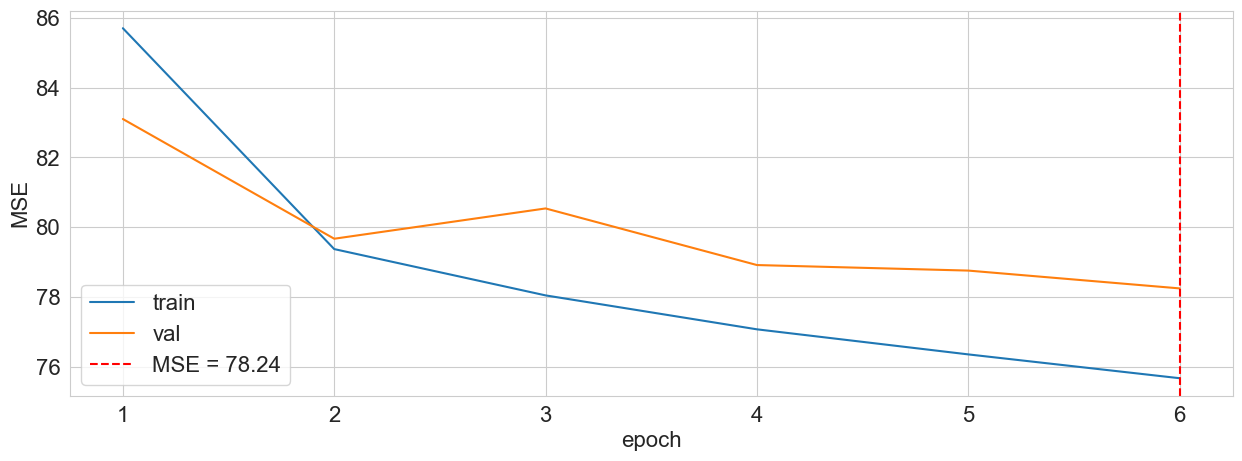

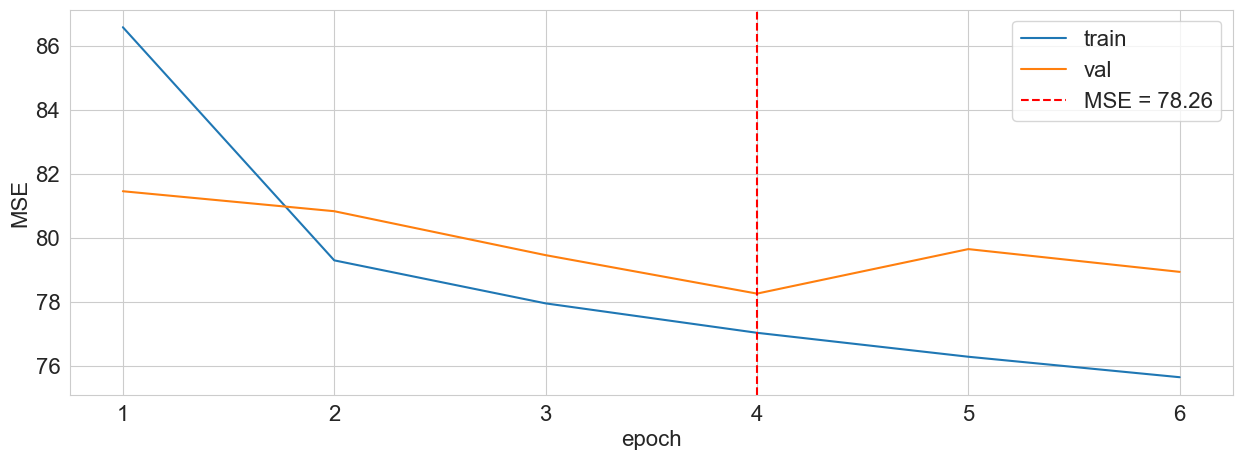

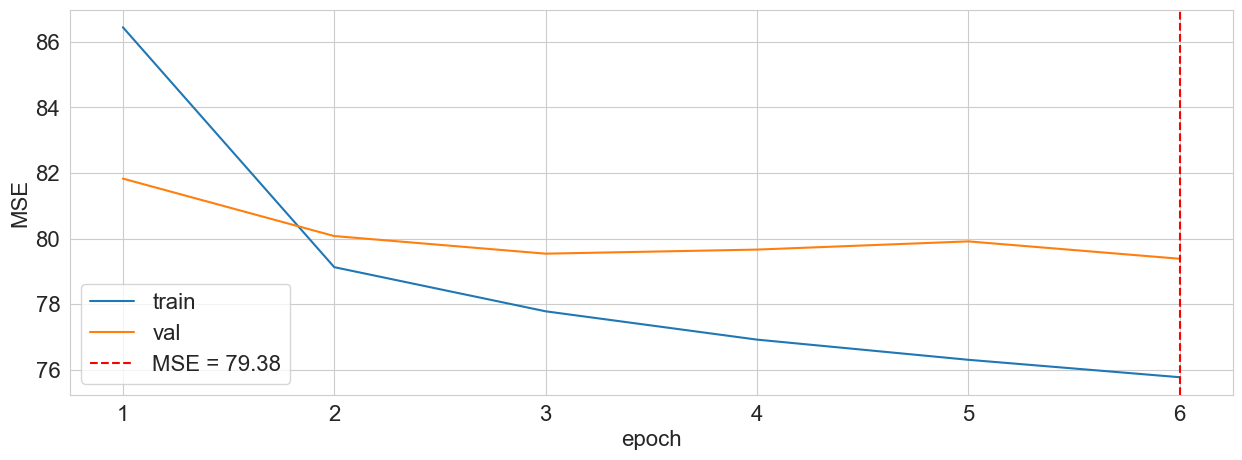

In [30]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 128),
            mm.ReLU(),
            mm.Linear(128, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)

        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics, val_metrics = \
    trial(metric, train_loader, val_loader, 6)

In [51]:
val_metrics_final = np.min(val_metrics, axis=1) # берем лучшие значения MSE (красная линия)

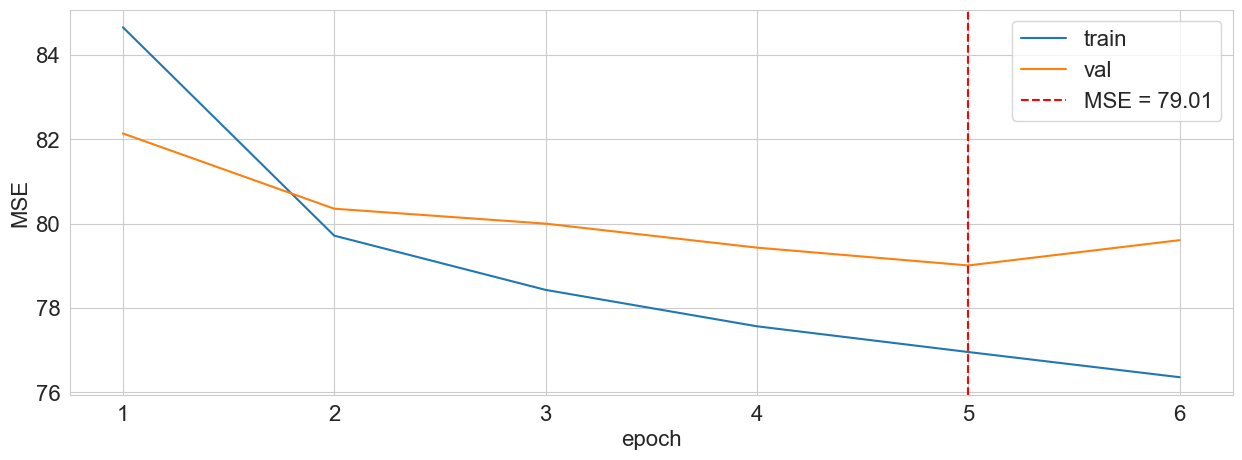

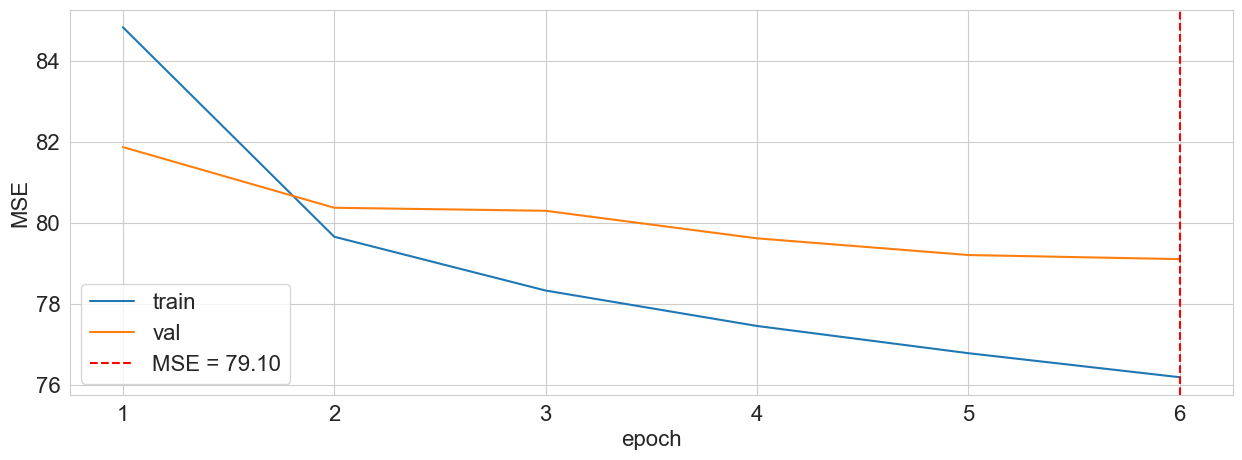

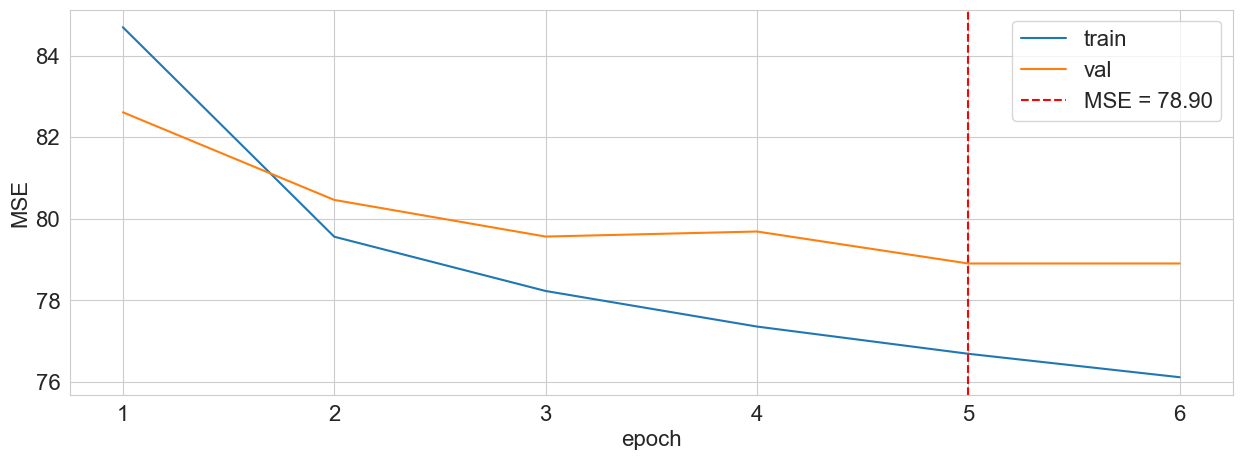

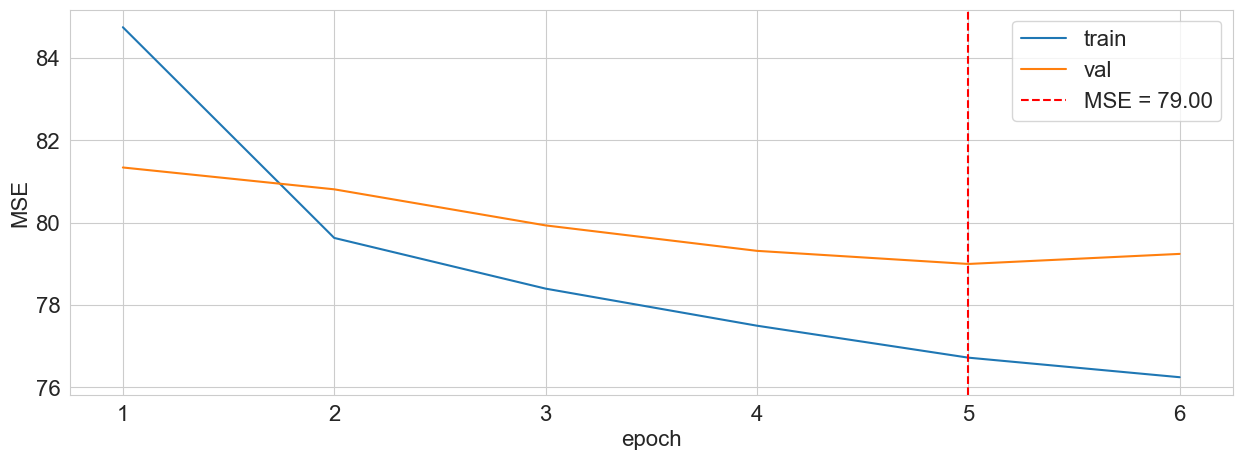

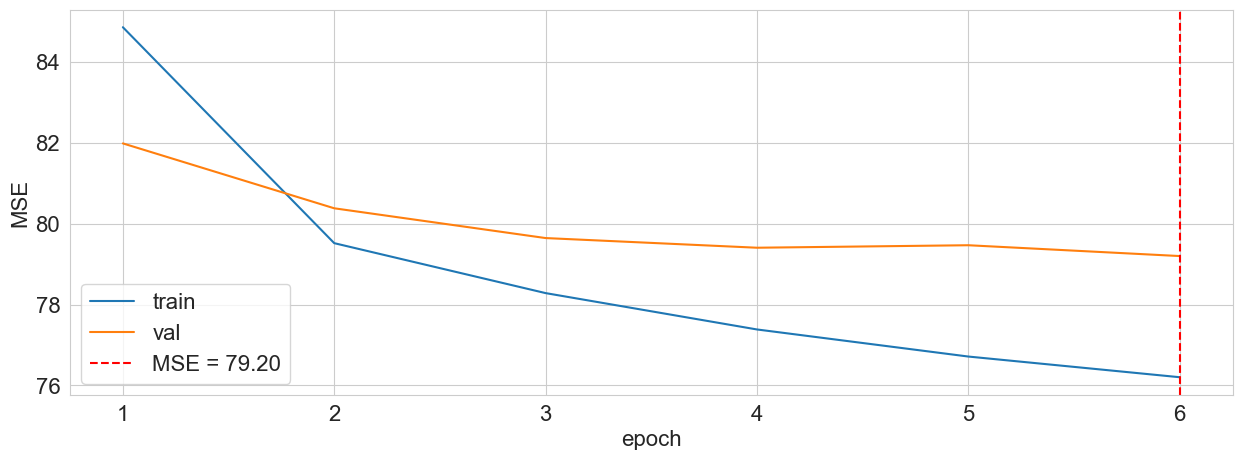

In [31]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 128),
            mm.ReLU(),
            mm.Linear(128, 1),
            mm.Sigmoid()
        )

        optimizer = mm.SGD(model, lr=0.5)

        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics2, val_metrics2 = \
    trial(metric, train_loader, val_loader, 6)

In [52]:
val_metrics2_final = np.min(val_metrics2, axis=1) # берем лучшие значения MSE (красная линия)

<Axes: xlabel='optimizer', ylabel='mse'>

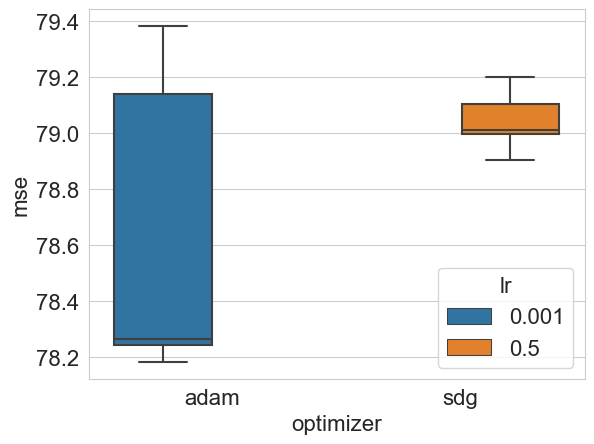

In [53]:
data = pd.DataFrame(
    dict(
        mse = val_metrics_final.tolist() + val_metrics2_final.tolist(),
        optimizer = 5 * ['adam'] + 5 * ['sdg'],
        lr = 5 * ['0.001'] + 5 * ['0.5']
    )
)

sns.boxplot(data=data, x="optimizer", y="mse", hue="lr")

**Ответ:**

У adam меньше ошибка так что берем его. Большая дисперсия это конечно плохо, но наверное я просто немного недообучил его, и из-за этого в некоторых из эксперементов лучшее MSE слишком большое 

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

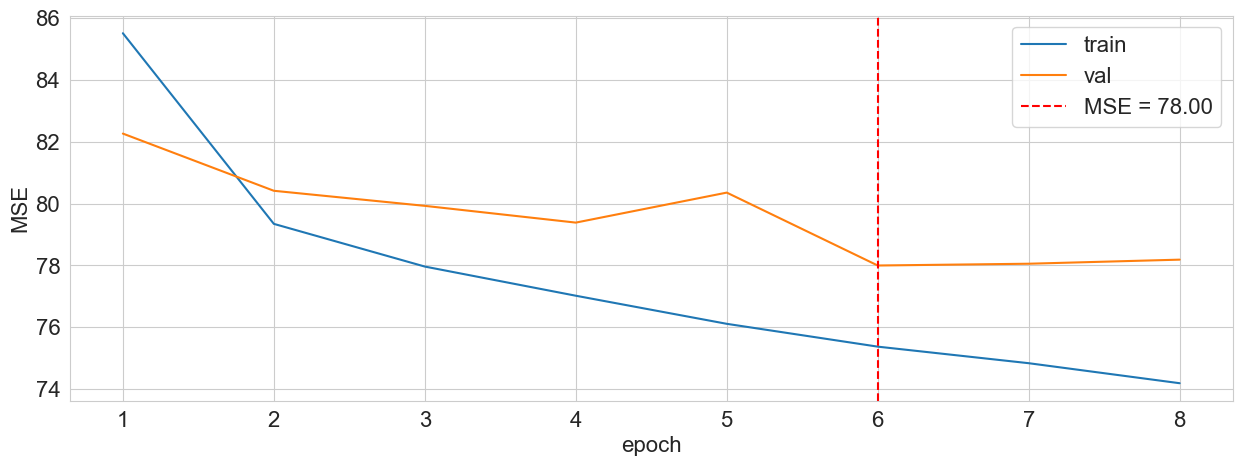

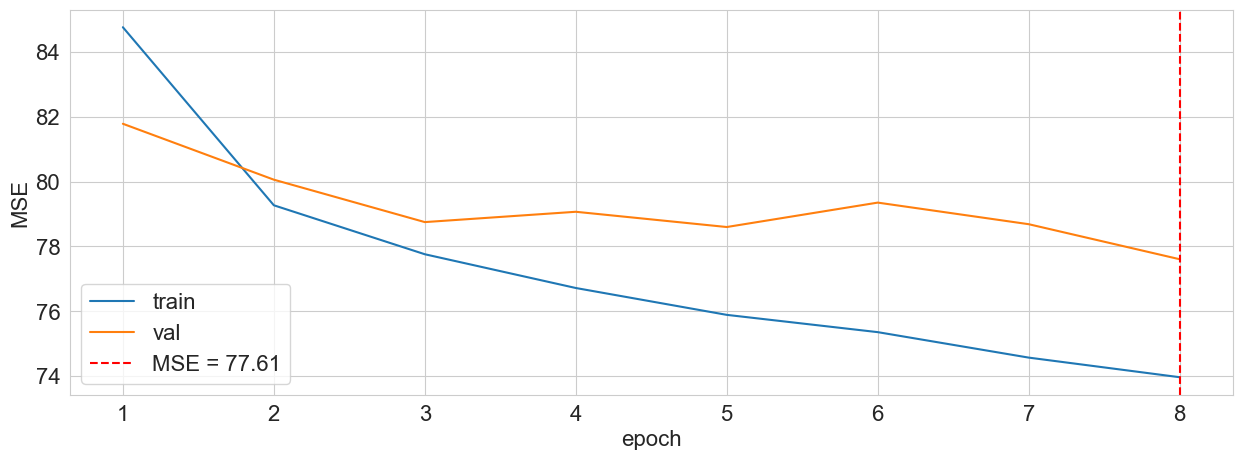

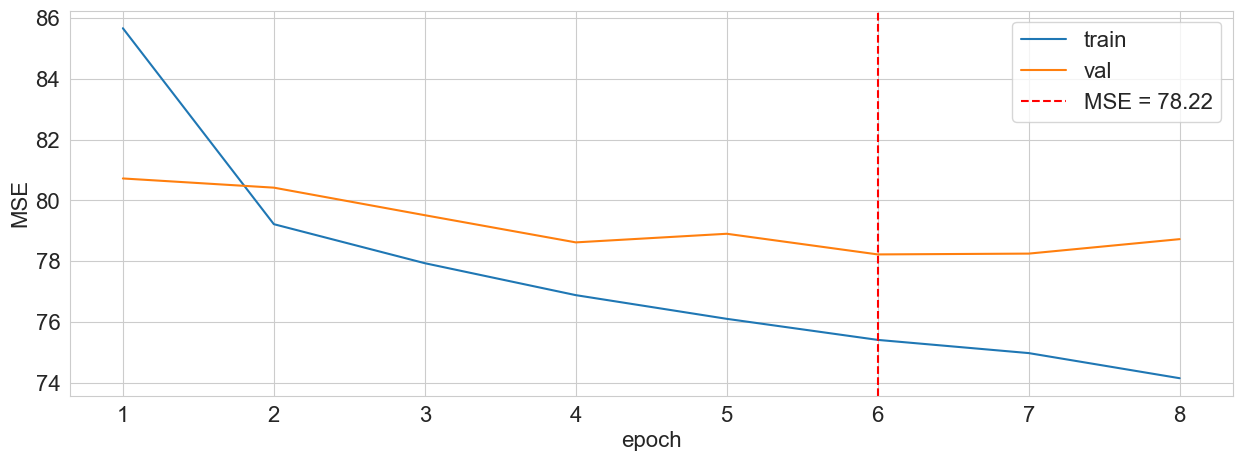

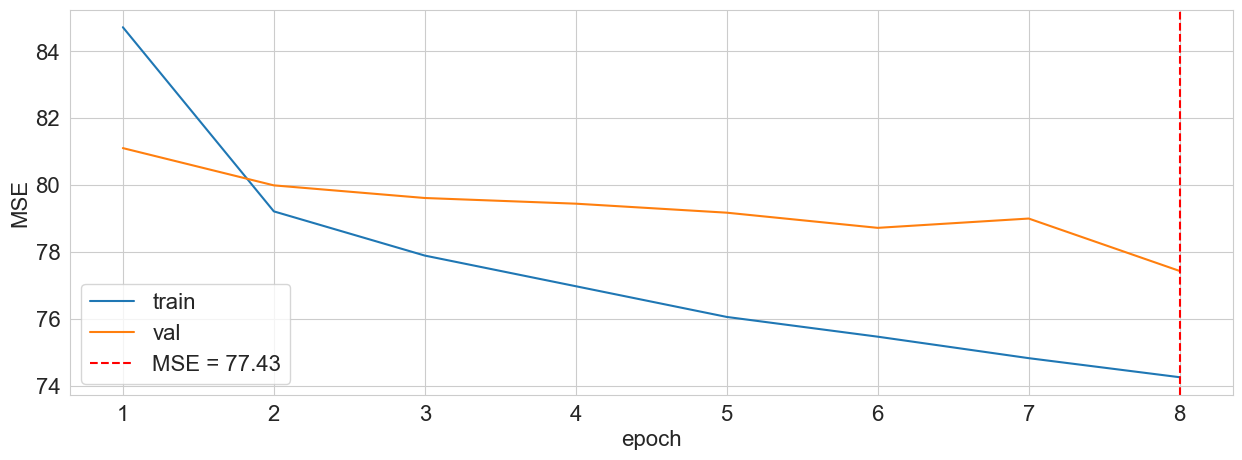

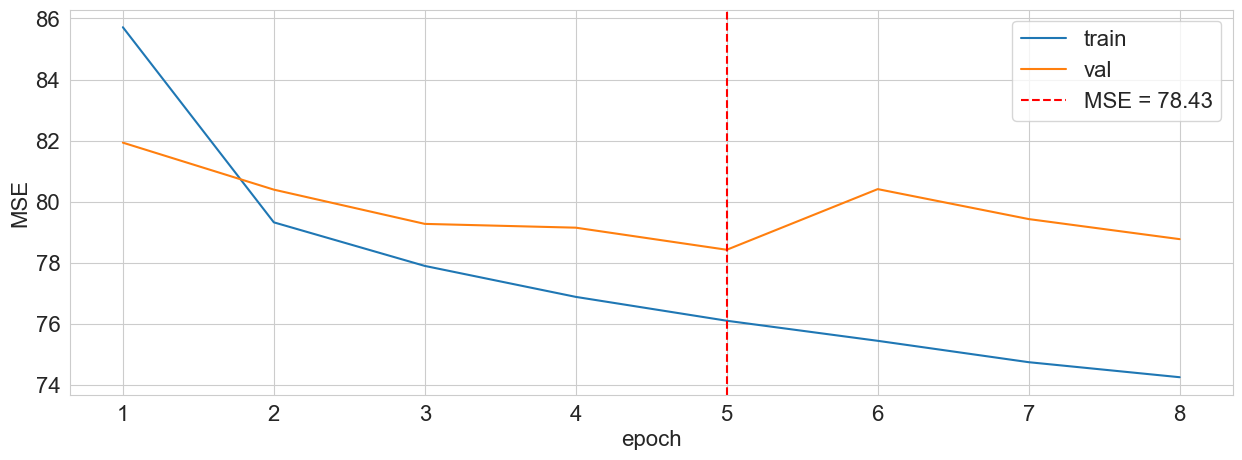

In [61]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.ReLU(),
            mm.Linear(256, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics3, val_metrics3 = \
    trial(metric, train_loader, val_loader, 8)

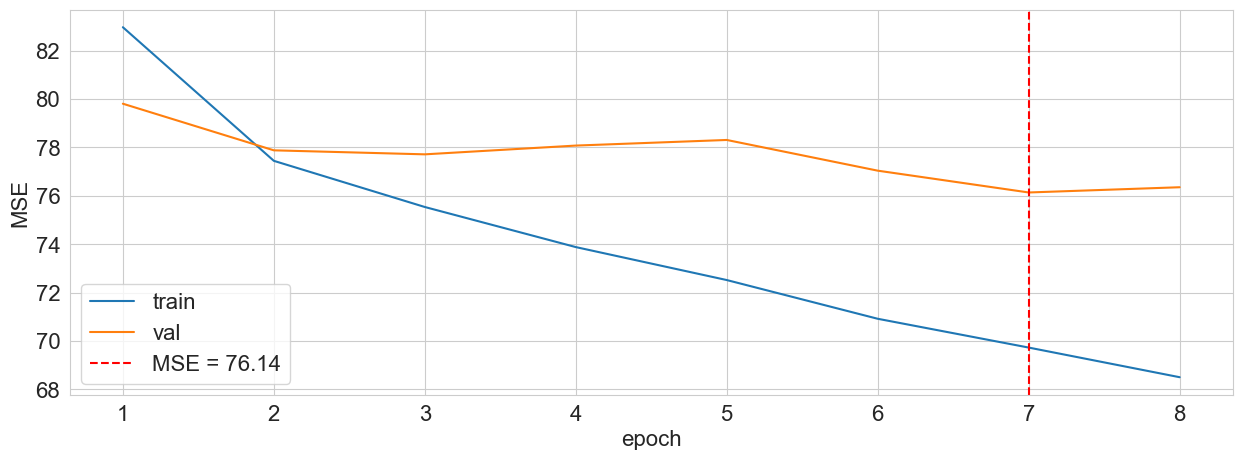

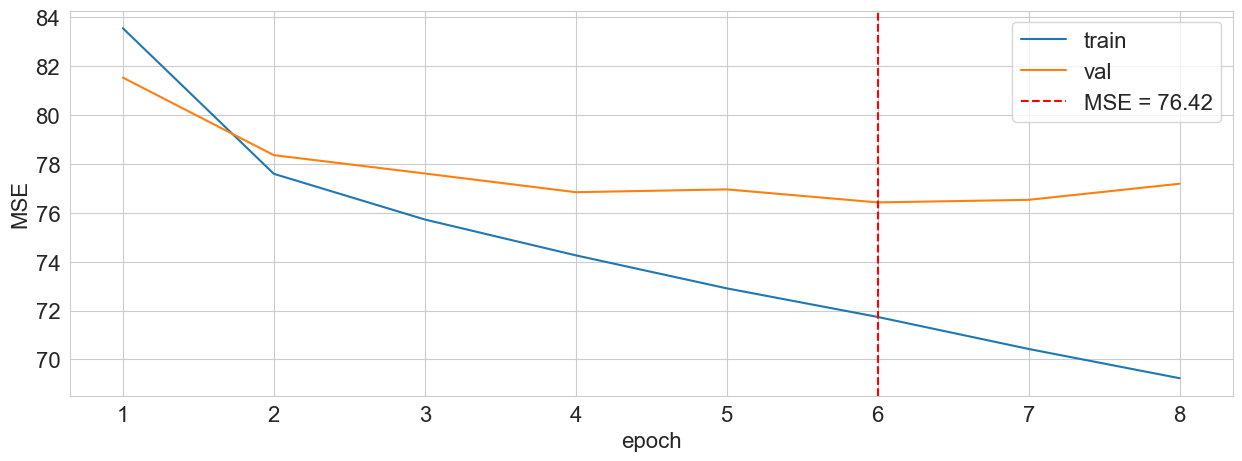

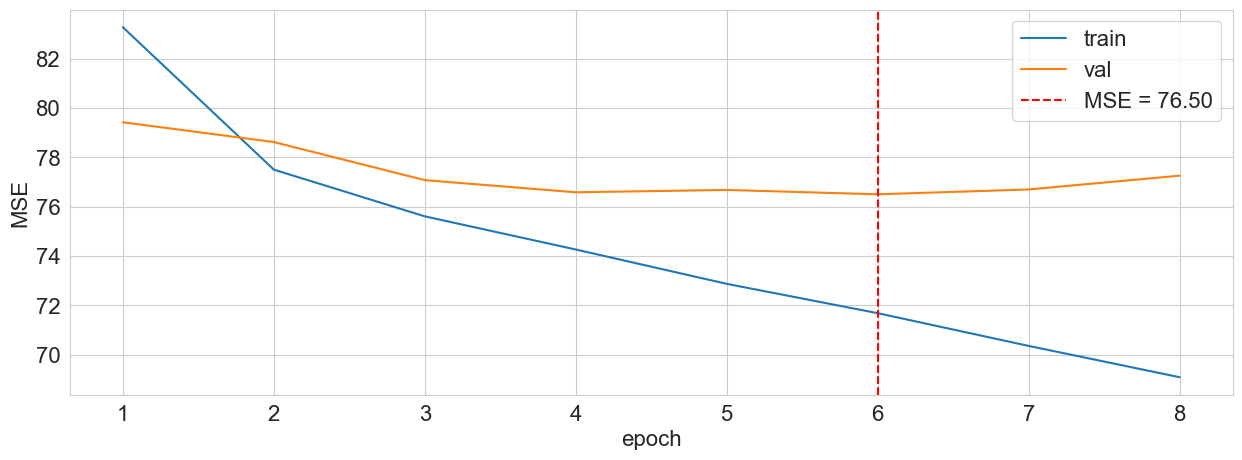

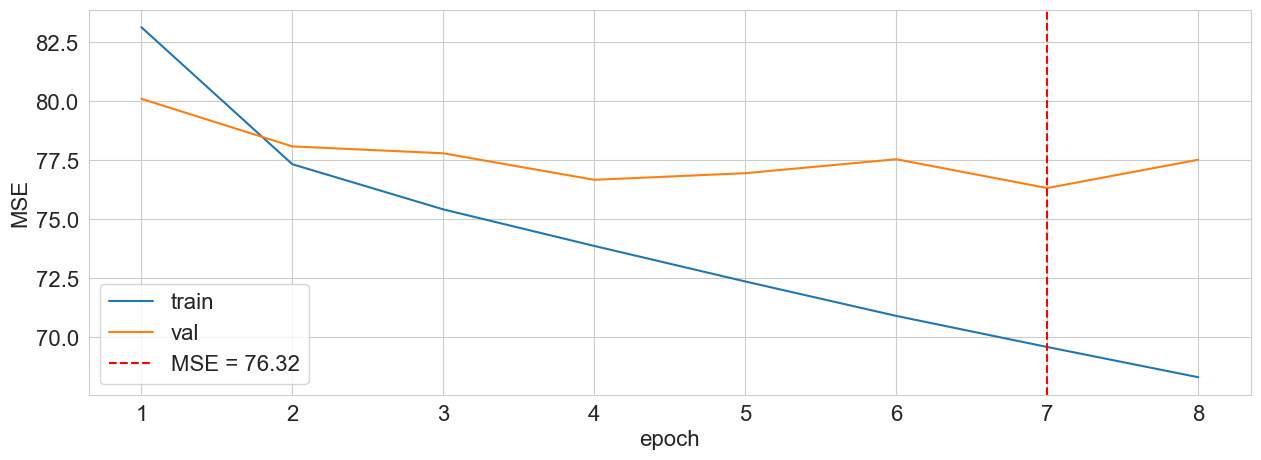

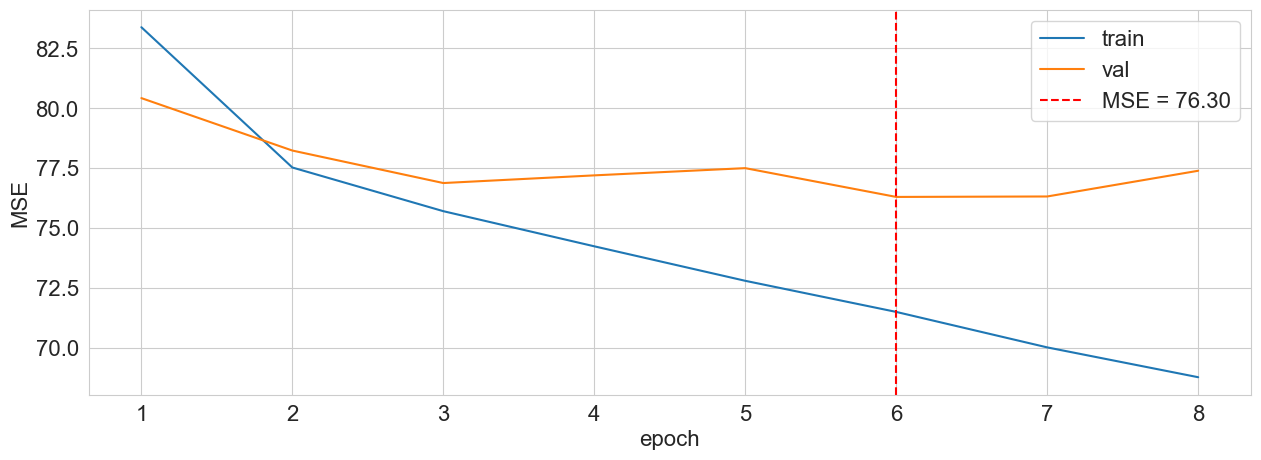

In [62]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics4, val_metrics4 = \
    trial(metric, train_loader, val_loader, 8)

In [91]:
val_metrics3_final = np.min(val_metrics3, axis=1) # берем лучшие значения MSE (красная линия)
val_metrics4_final = np.min(val_metrics4, axis=1)

# берем соответствующие выбранным эпохам значения MSE на трейне
train_metrics_final = np.array(train_metrics)[np.arange(5), np.argmin(val_metrics, axis=1)]
train_metrics3_final = np.array(train_metrics3)[np.arange(5), np.argmin(val_metrics3, axis=1)]
train_metrics4_final = np.array(train_metrics4)[np.arange(5), np.argmin(val_metrics4, axis=1)]

<Axes: xlabel='width', ylabel='mse'>

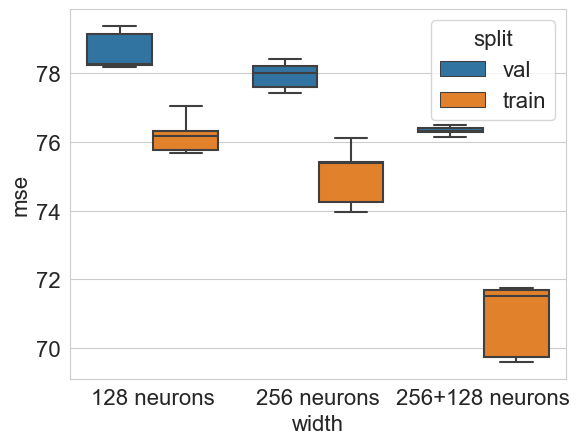

In [92]:
data2 = pd.DataFrame(
    dict(
        mse = val_metrics_final.tolist() + val_metrics3_final.tolist() + val_metrics4_final.tolist() \
        + train_metrics_final.tolist() + train_metrics3_final.tolist() + train_metrics4_final.tolist(),
        width = 5 * ['128 neurons'] + 5 * ['256 neurons'] + 5 * ['256+128 neurons'] \
        + 5 * ['128 neurons'] + 5 * ['256 neurons'] + 5 * ['256+128 neurons'],
        split = 15 * ['val'] + 15 * ['train']
    )
)

sns.boxplot(data=data2, x="width", y="mse", hue='split')

**Ответ:**

При увеличении размера слоя становится лучше ошибка на валидации.

При добавлени еще одного слоя существенно возрастает качество и уменьшается дисперсия MSE на валидации, но при этом сильно растет и переобучене (train_mse - val_mse)

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов. 

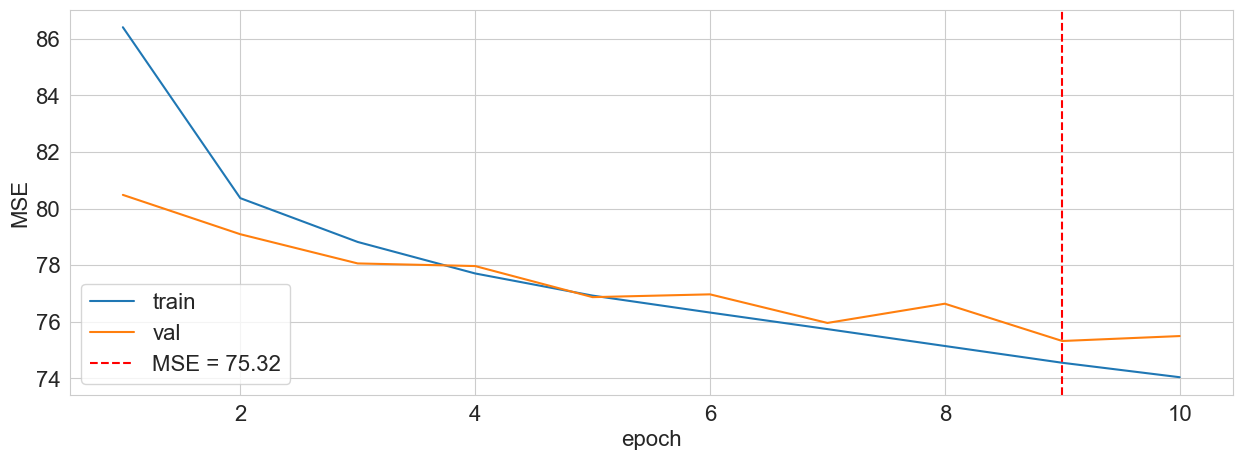

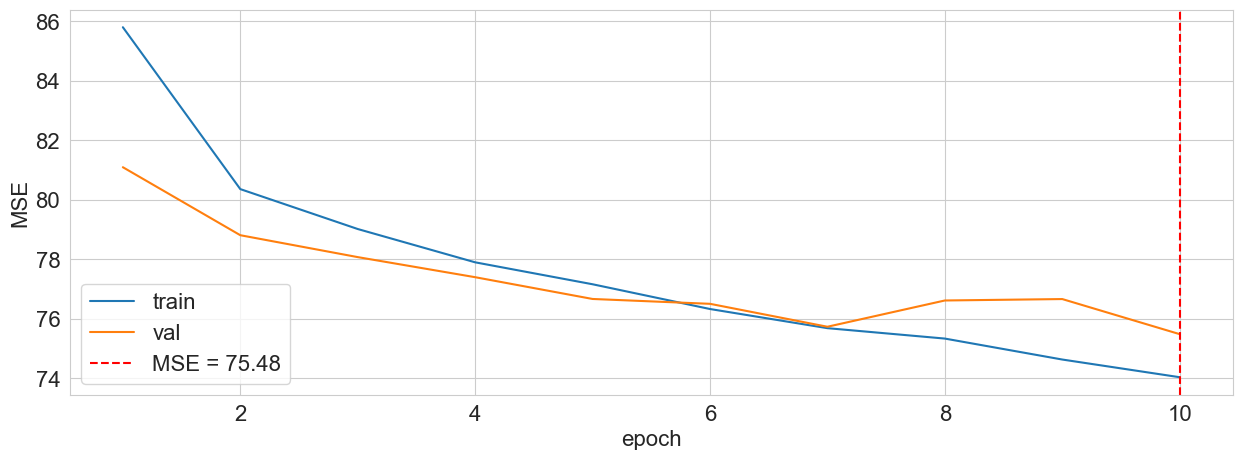

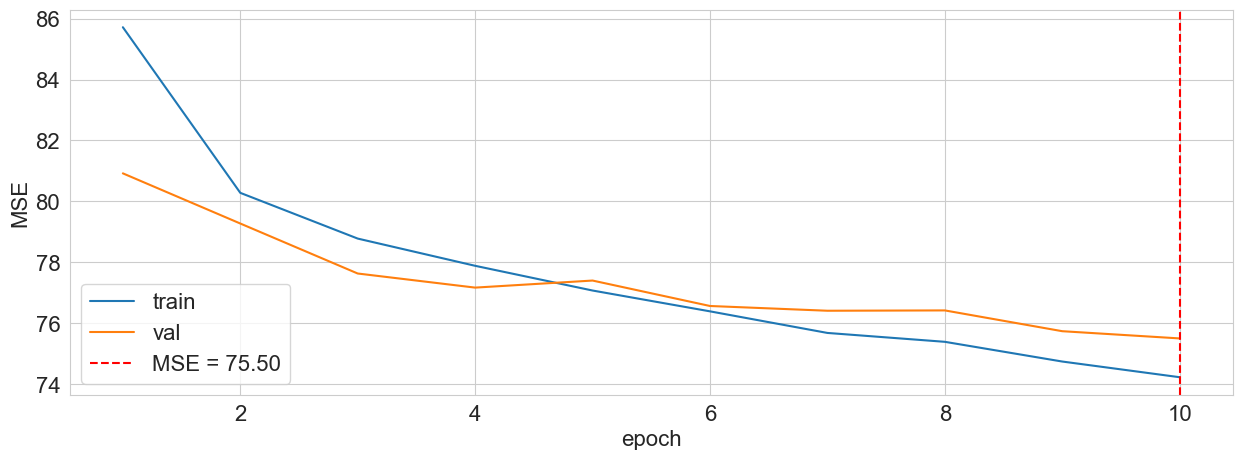

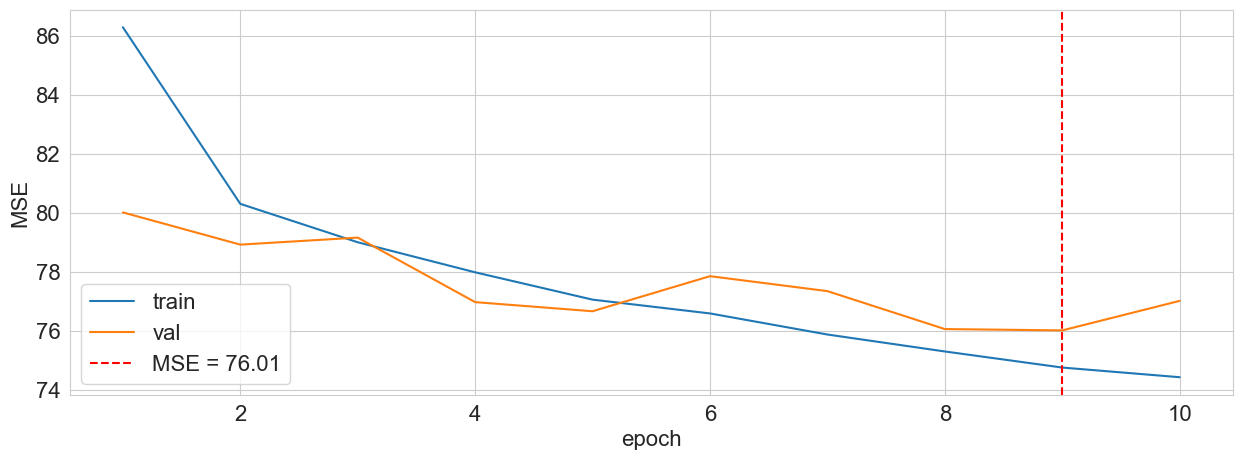

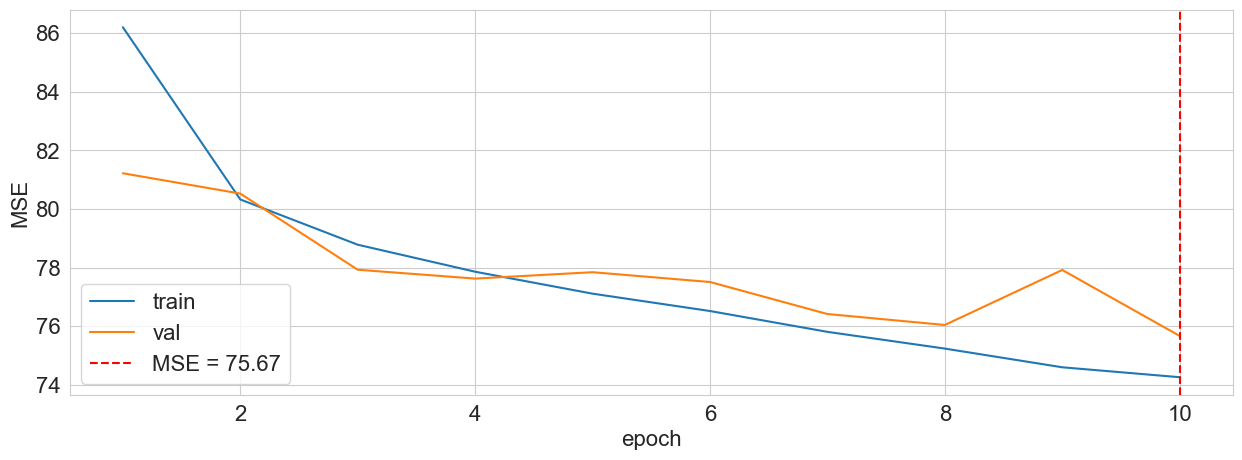

In [93]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics5, val_metrics5 = \
    trial(metric, train_loader, val_loader, 10)

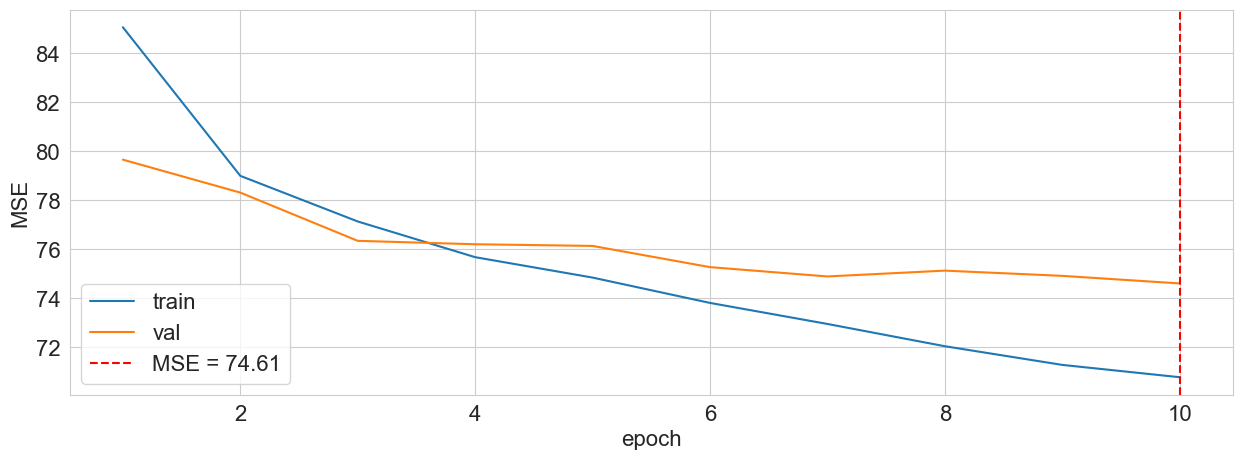

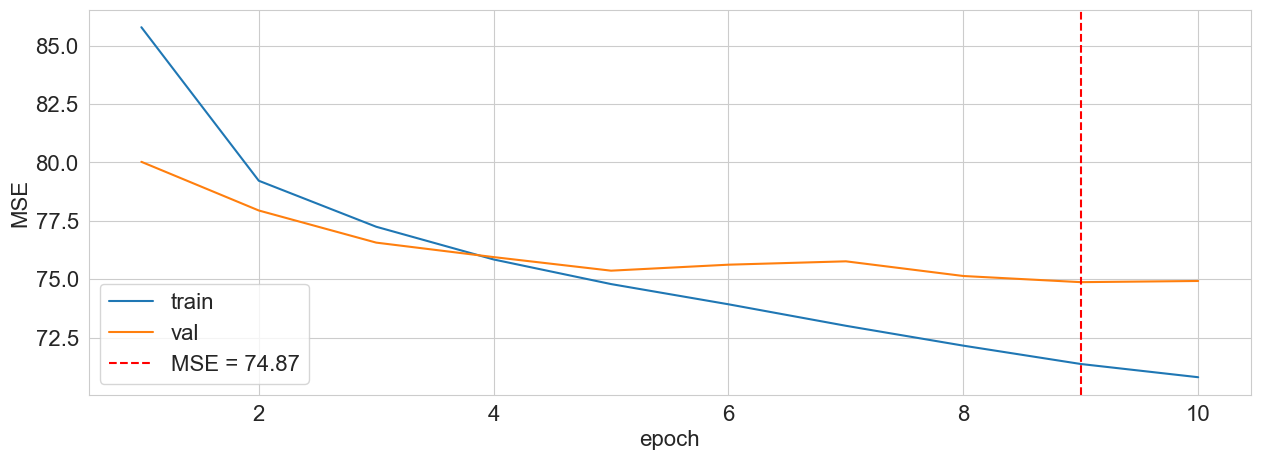

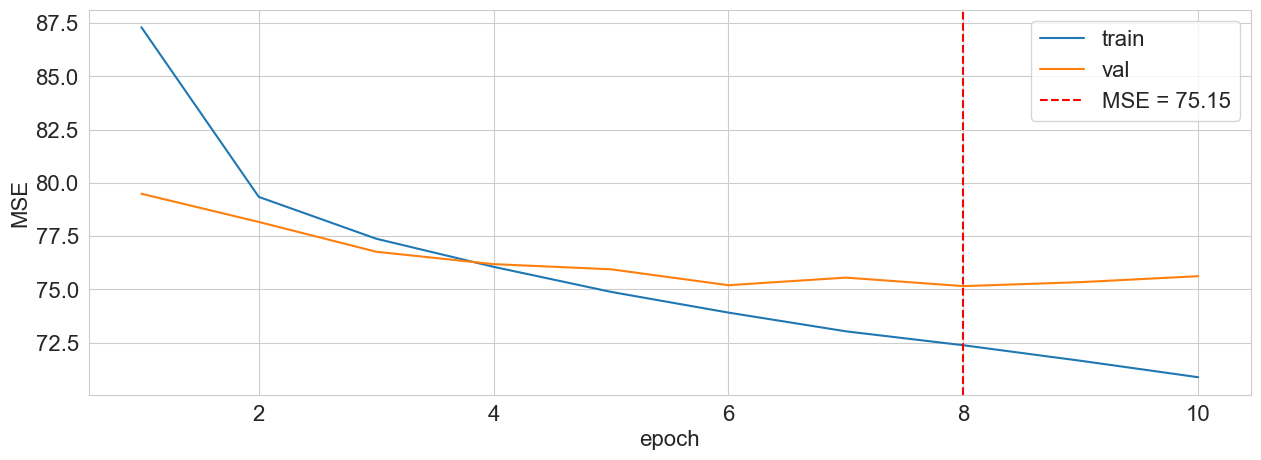

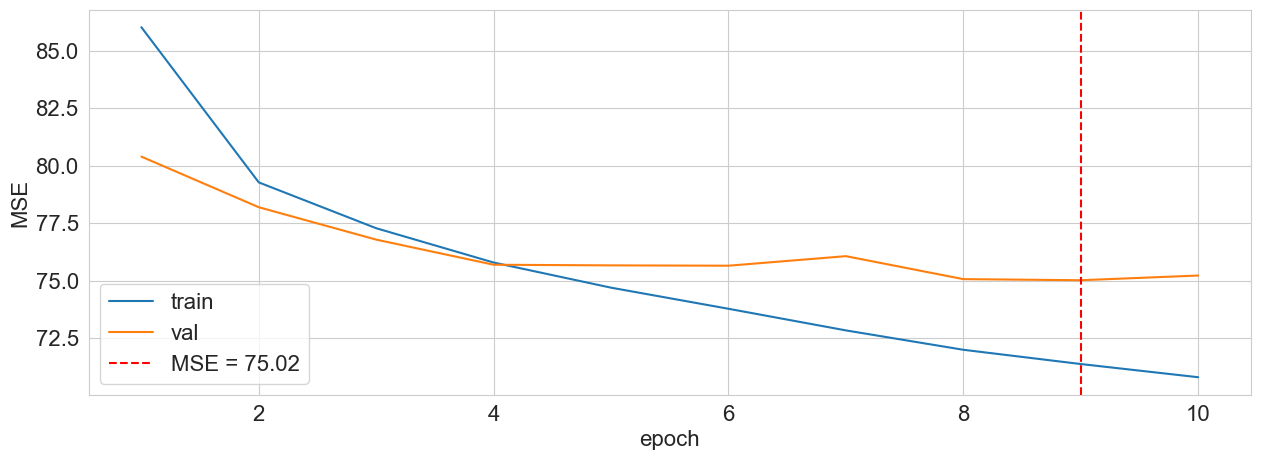

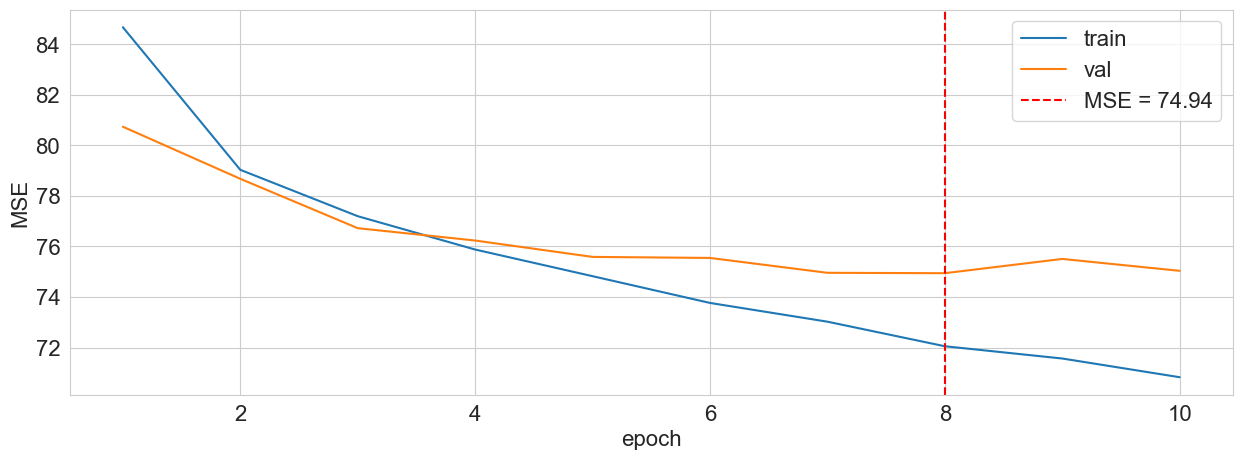

In [94]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.BatchNormalization(256),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.BatchNormalization(90),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics6, val_metrics6 = \
    trial(metric, train_loader, val_loader, 10)

In [95]:
val_metrics5_final = np.min(val_metrics5, axis=1) # берем лучшие значения MSE (красная линия)
val_metrics6_final = np.min(val_metrics6, axis=1)

# берем соответствующие выбранным эпохам значения MSE на трейне
train_metrics5_final = np.array(train_metrics5)[np.arange(5), np.argmin(val_metrics5, axis=1)]
train_metrics6_final = np.array(train_metrics6)[np.arange(5), np.argmin(val_metrics6, axis=1)]

<Axes: xlabel='structure', ylabel='mse'>

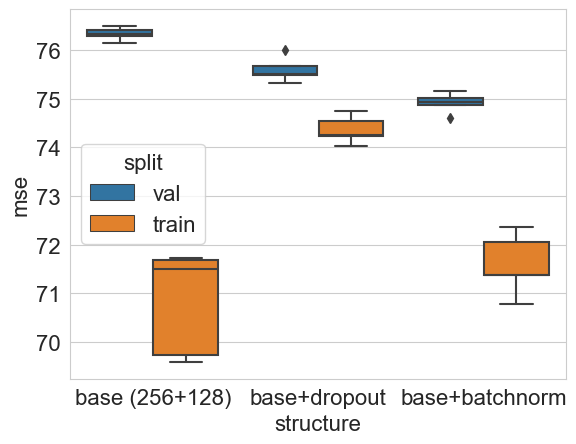

In [98]:
data3 = pd.DataFrame(
    dict(
        mse = val_metrics4_final.tolist() + val_metrics5_final.tolist() + val_metrics6_final.tolist() \
        + train_metrics4_final.tolist() + train_metrics5_final.tolist() + train_metrics6_final.tolist(),
        structure = 5 * ['base (256+128)'] + 5 * ['base+dropout'] + 5 * ['base+batchnorm'] \
        + 5 * ['base (256+128)'] + 5 * ['base+dropout'] + 5 * ['base+batchnorm'],
        split = 15 * ['val'] + 15 * ['train']
    )
)

sns.boxplot(data=data3, x="structure", y="mse", hue='split')

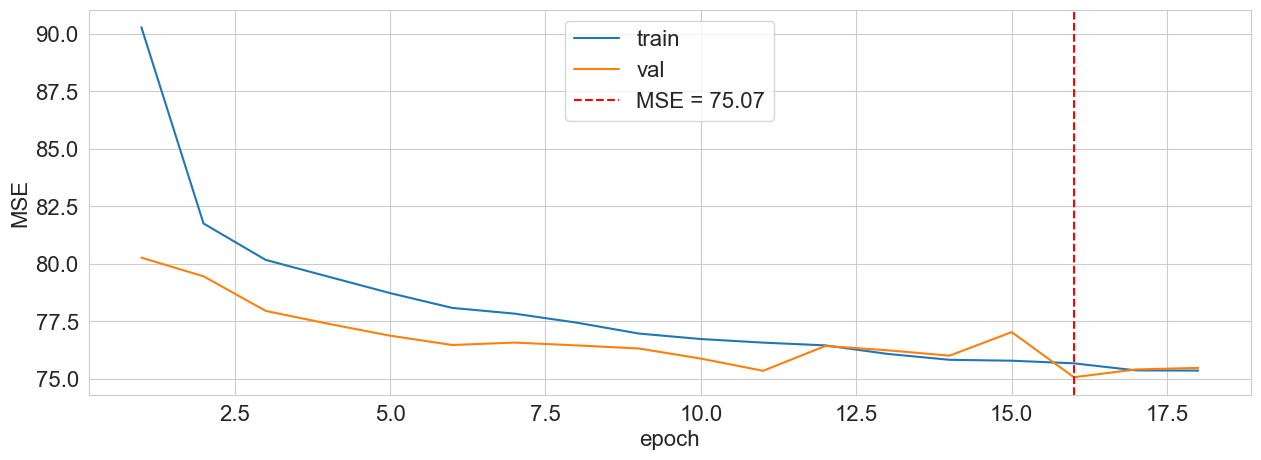

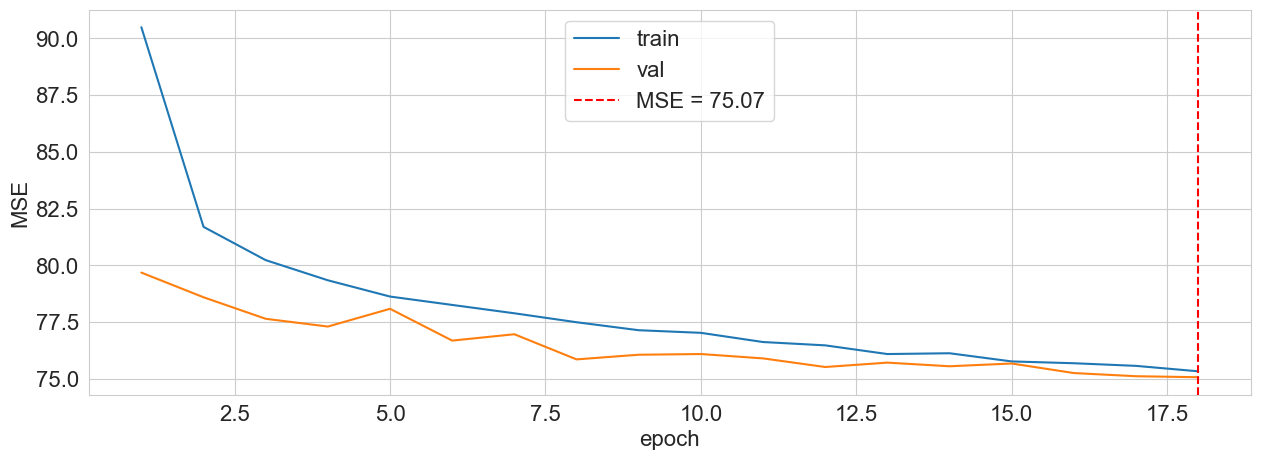

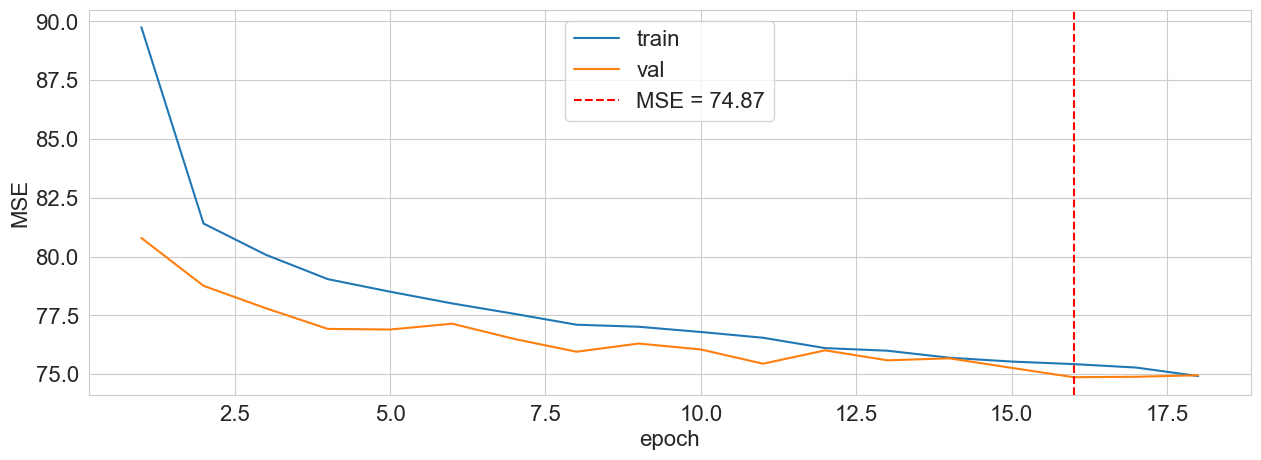

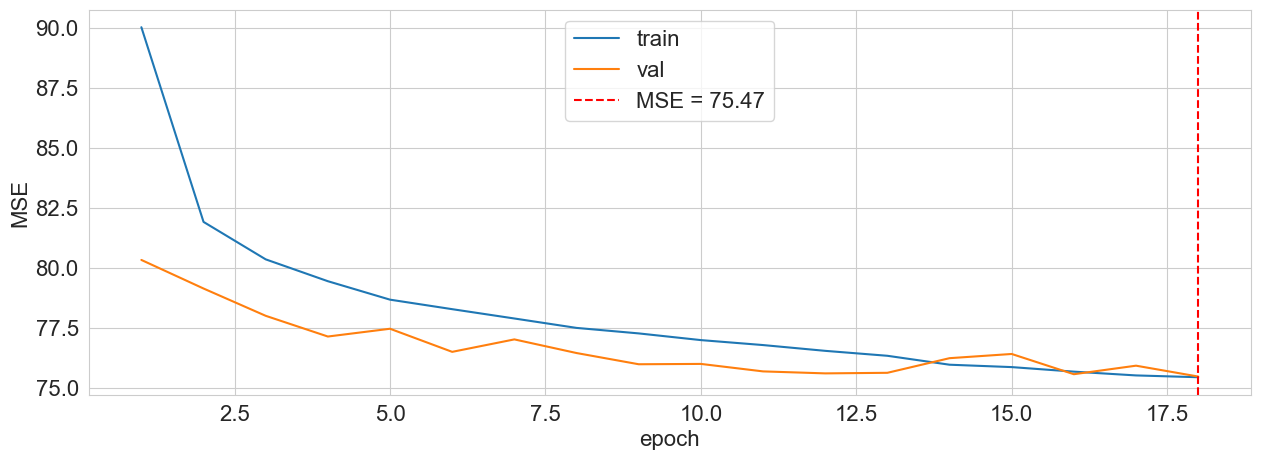

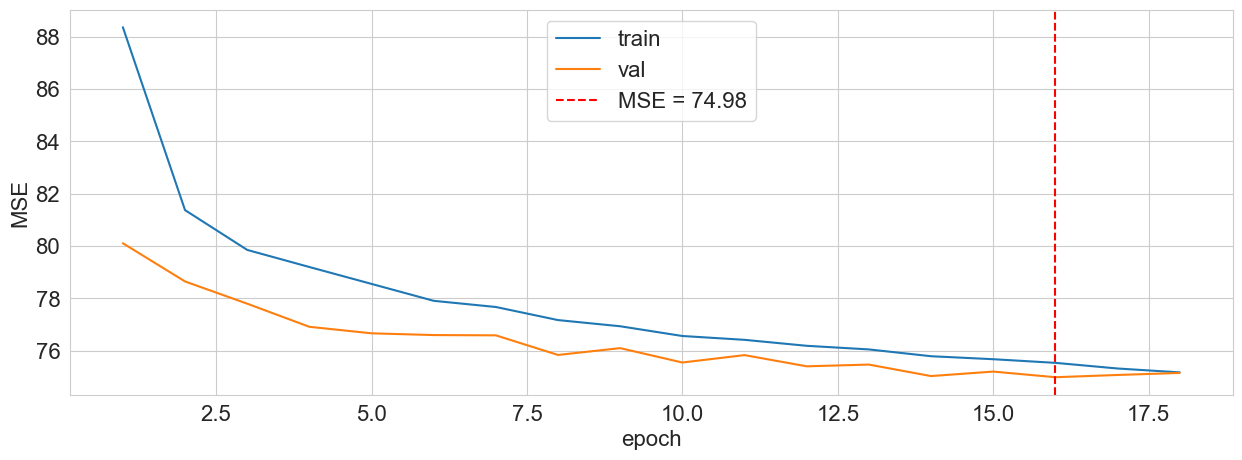

In [107]:
def trial(metric, train_loader, val_loader, num_epochs):
    train_metrics = []
    val_metrics = []
    
    for i in range(5):
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.BatchNormalization(256),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.BatchNormalization(90),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=0.001)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics7, val_metrics7 = \
    trial(metric, train_loader, val_loader, 18)

In [108]:
val_metrics7_final = np.min(val_metrics7, axis=1) # берем лучшие значения MSE (красная линия)

# берем соответствующие выбранным эпохам значения MSE на трейне
train_metrics7_final = np.array(train_metrics7)[np.arange(5), np.argmin(val_metrics7, axis=1)]

<Axes: xlabel='structure', ylabel='mse'>

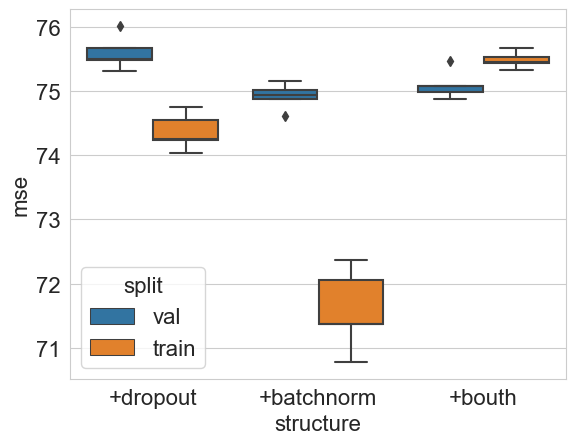

In [121]:
data3 = pd.DataFrame(
    dict(
        mse = val_metrics5_final.tolist() + val_metrics6_final.tolist() + val_metrics7_final.tolist() \
        + train_metrics5_final.tolist() + train_metrics6_final.tolist() + train_metrics7_final.tolist(),
        structure = 5 * ['+dropout'] + 5 * ['+batchnorm'] + 5 * ['+bouth'] \
        + 5 * ['+dropout'] + 5 * ['+batchnorm'] + 5 * ['+bouth'],
        split = 15 * ['val'] + 15 * ['train']
    )
)

sns.boxplot(data=data3, x="structure", y="mse", hue='split')

**Ответ:**

Droput улучшил качество и существенно уменьшил переобучение, а batchnorm существеено улучшил качество и уменьшил переобучение, что в целом не удивительно.

Вместе результат самый хороший (если еще дольше обучать), но так как слишком долго работает (нет правда, по полчаса на итерацию я просто не успею до дедлайна все сделать), то мы остановимся на батчнорме.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

### Тут я пытался постоить очень глубокую, но зря

Очень долго обучается и как будто бы результаты так себе, так что дальше будем делать только батчнорму (этот эксперимент можно скипать)

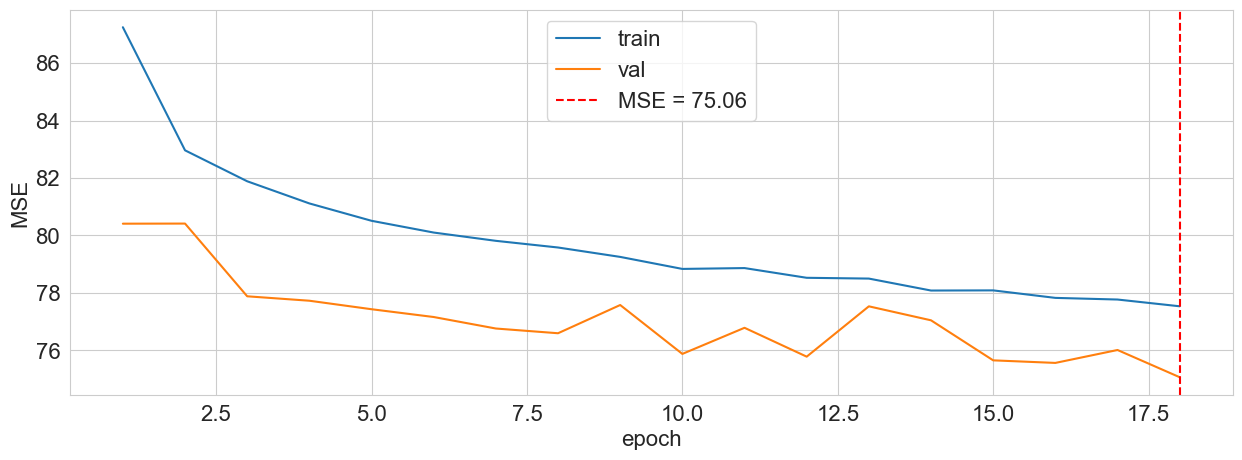

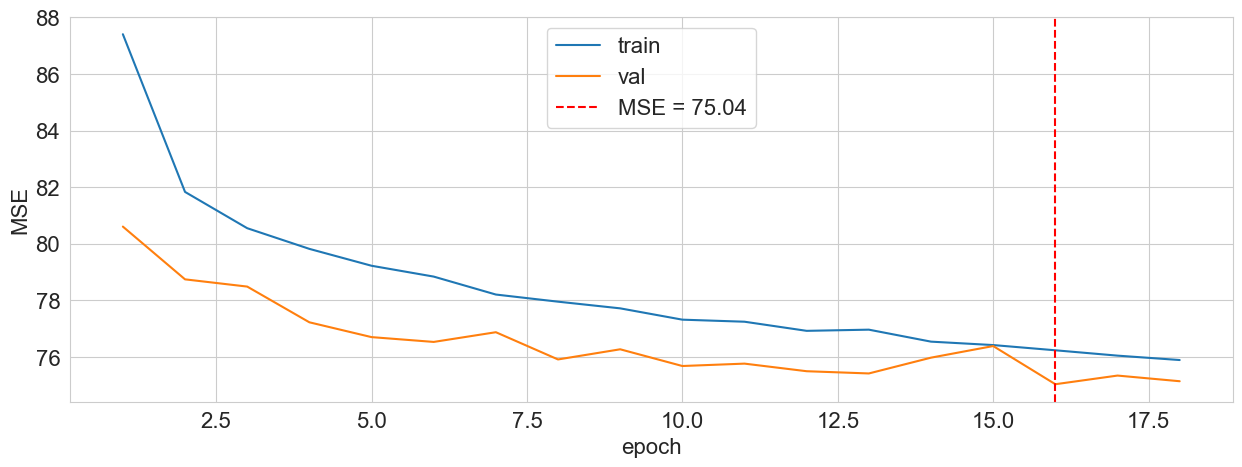

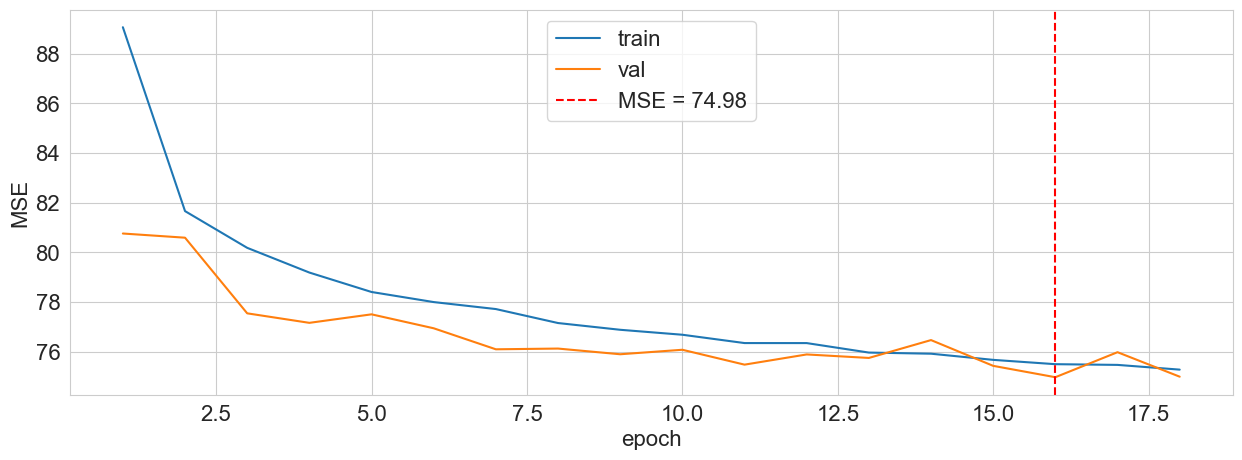

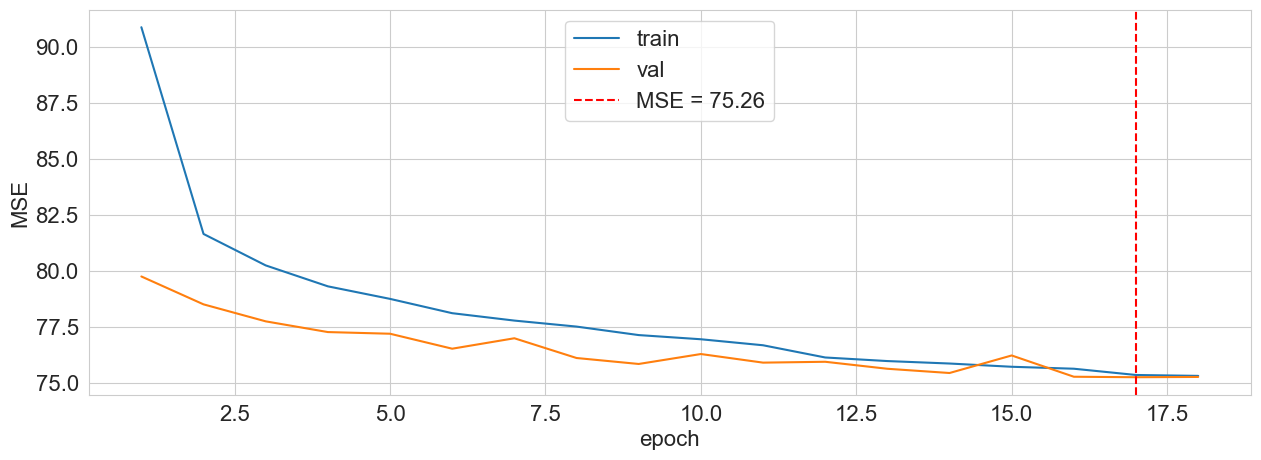

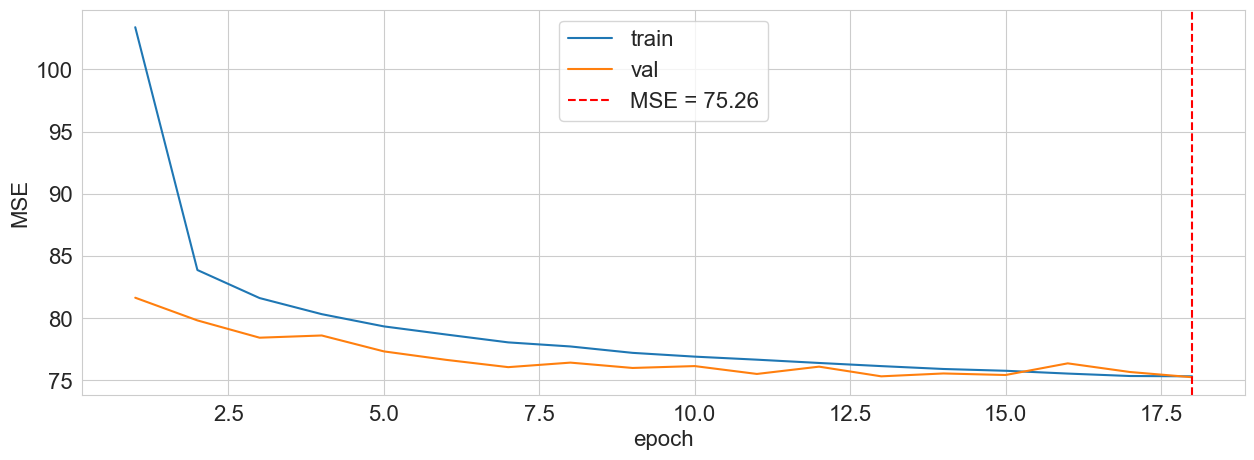

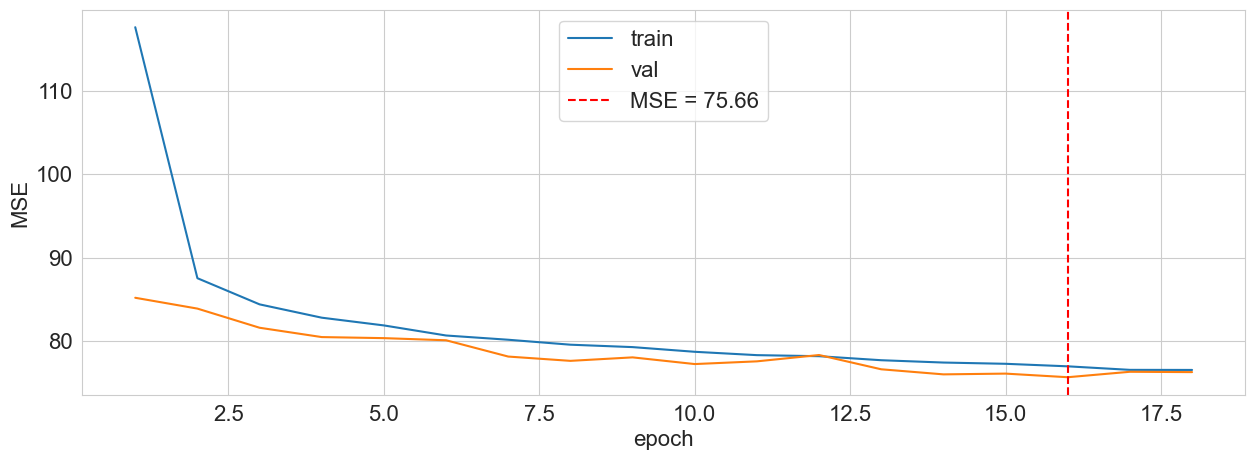

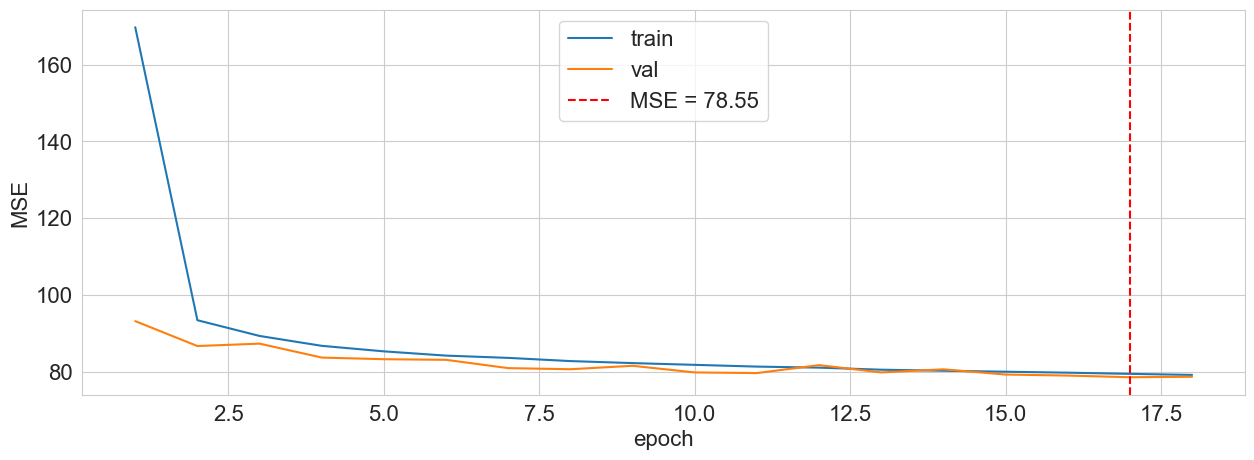

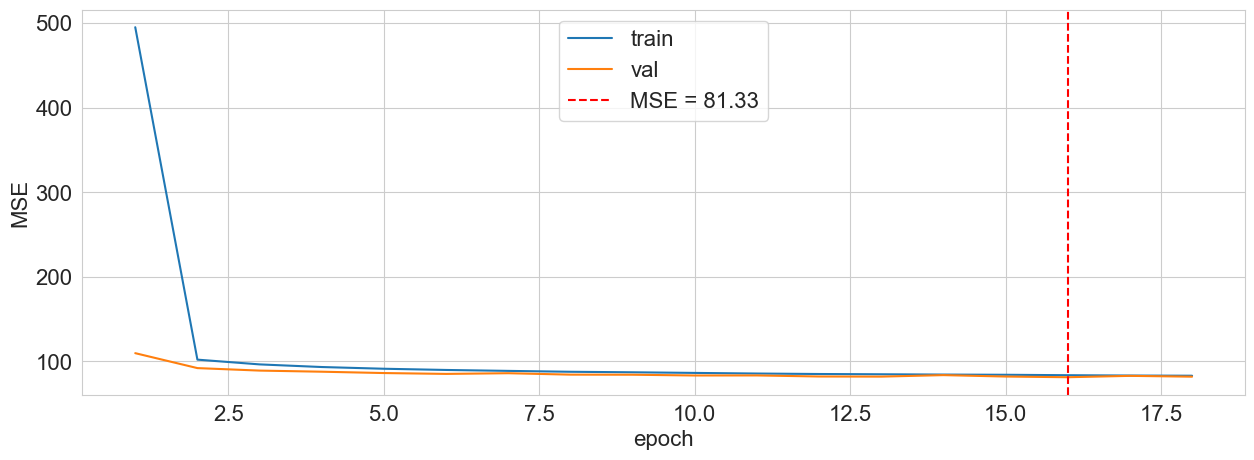

In [125]:
lrs = np.logspace(-2, -5, 8)

def trial(metric, train_loader, val_loader, num_epochs, lrs):
    train_metrics = []
    val_metrics = []
    
    for lr in lrs:
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.BatchNormalization(256),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.BatchNormalization(90),
            mm.Dropout(0.2),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=lr)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics8, val_metrics8 = \
    trial(metric, train_loader, val_loader, 18, lrs)

In [168]:
val_metrics8_final = np.min(val_metrics8, axis=1) # берем лучшие значения MSE (красная линия)

# берем соответствующие выбранным эпохам значения MSE на трейне
train_metrics8_final = np.array(train_metrics8)[np.arange(8), np.argmin(val_metrics8, axis=1)]

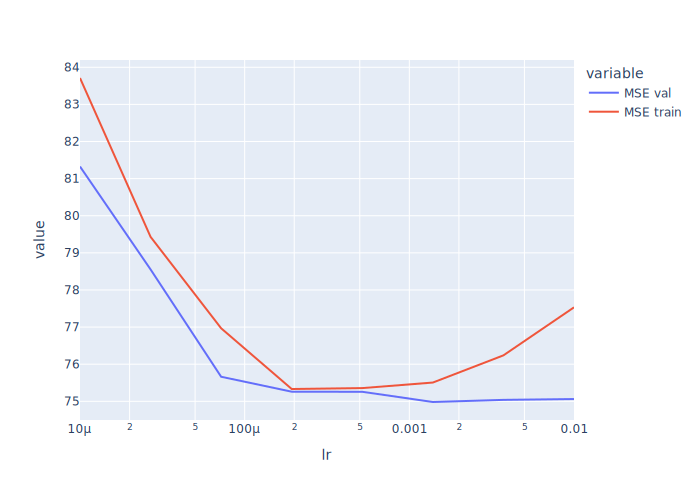

In [170]:
import plotly.express as px

df = pd.DataFrame(np.array([lrs, val_metrics8_final, train_metrics8_final]).T, columns=['lr', 'MSE val', 'MSE train'])
px.line(df, x='lr', y=['MSE val', 'MSE train'], log_x=True).show('svg')

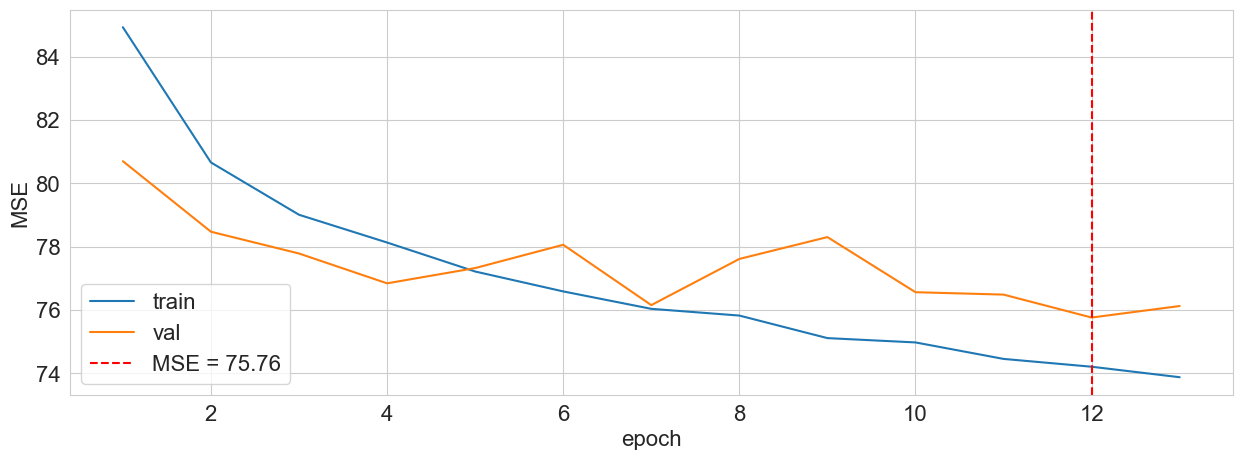

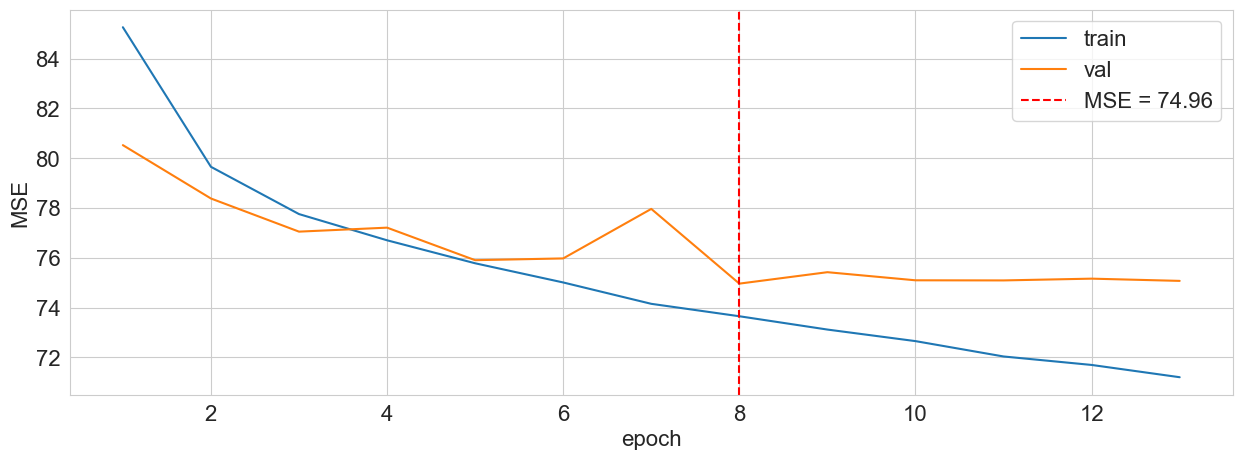

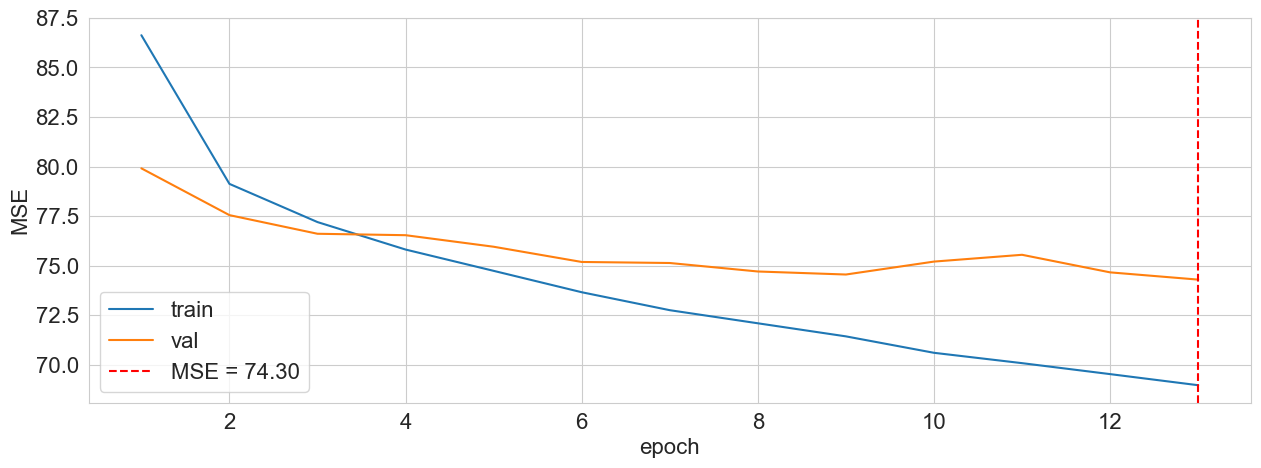

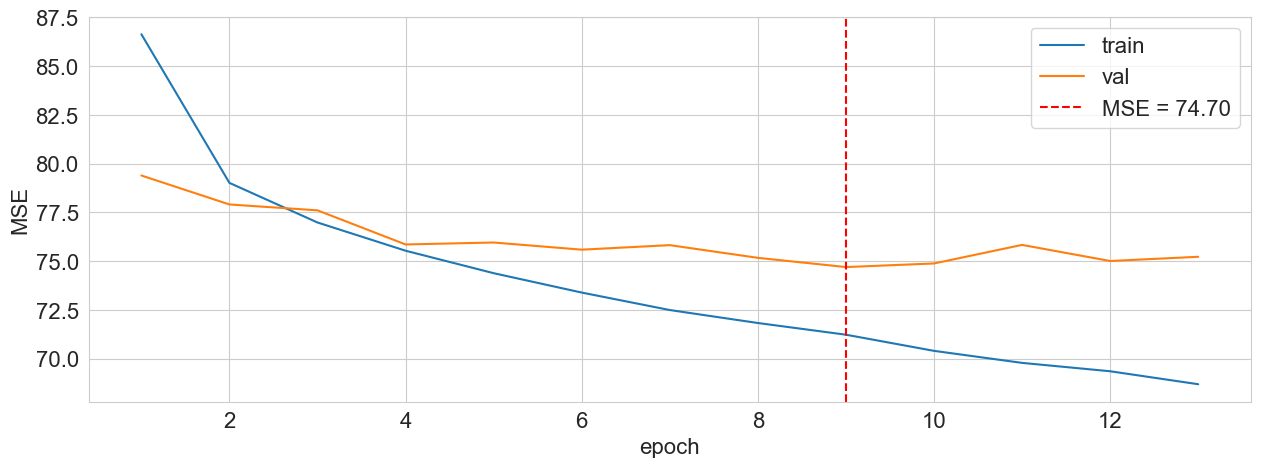

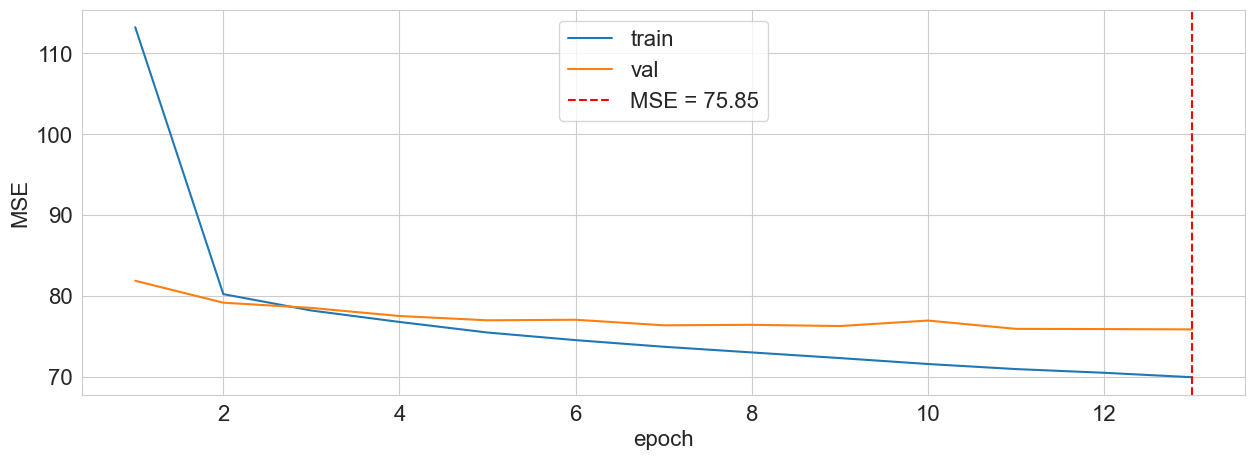

In [182]:
lrs = np.logspace(-2, -4, 5)

def trial(metric, train_loader, val_loader, num_epochs, lrs):
    train_metrics = []
    val_metrics = []
    
    for lr in lrs:
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.BatchNormalization(256),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.BatchNormalization(90),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=lr)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics9, val_metrics9 = \
    trial(metric, train_loader, val_loader, 13, lrs)

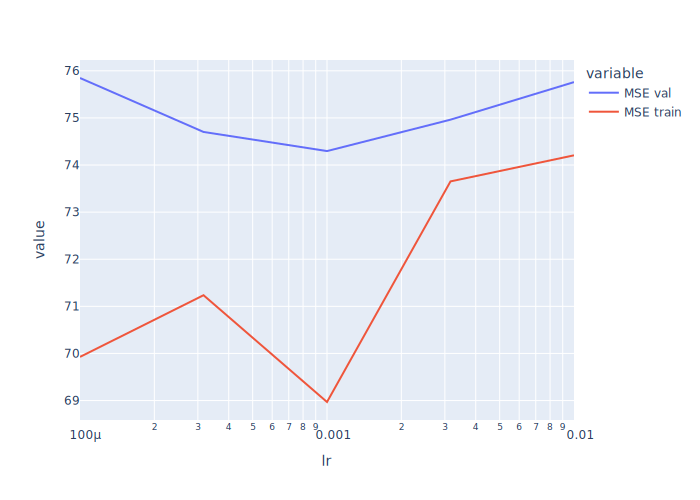

In [191]:
val_metrics9_final = np.min(val_metrics9, axis=1) # берем лучшие значения MSE (красная линия)

# берем соответствующие выбранным эпохам значения MSE на трейне
train_metrics9_final = np.array(train_metrics9)[np.arange(5), np.argmin(val_metrics9, axis=1)]

df = pd.DataFrame(np.array([lrs, val_metrics9_final, train_metrics9_final]).T, columns=['lr', 'MSE val', 'MSE train'])
px.line(df, x='lr', y=['MSE val', 'MSE train'], log_x=True).show(renderer='svg')

Оптимальное значение lr = 0.001. прогнать код ниже я все равно не успею, а из опыта я почти уверен что weight_decay = 0 все рано давало бы самый хороший разультат так что будем тренировать финальную модель именно с этими параметрами.

### И все-таки

[тут](https://www.dropbox.com/scl/fo/hm9hz1ef9calo8y1n2nxk/AKYcba2h0V6MCGb4Ts08tNI?rlkey=ypk1ltz2srjczekclvm7egqto&st=dselh0if&dl=0) я прогоню и тут будут результаты 

In [ ]:
best_idx = np.argmin(val_metrics9_final)
best_lr = lrs[best_idx]

In [ ]:
wds = np.logspace(-6, -3, 6).tolist() + [0]

def trial(metric, train_loader, val_loader, num_epochs, wds, best_lr):
    train_metrics = []
    val_metrics = []
    
    for wd in wds:
        model = mm.Sequential(
            mm.Linear(90, 256),
            mm.BatchNormalization(256),
            mm.ReLU(),
            mm.Linear(256, 90),
            mm.BatchNormalization(90),
            mm.ReLU(),
            mm.Linear(90, 1),
            mm.Sigmoid()
        )

        optimizer = mm.Adam(model, lr=best_lr, weight_decay=wd)
        criterion = mm.MSELoss()
    
        t_mse, v_mse = train_and_validate(
            model,
            optimizer,
            criterion,
            metric,
            train_loader,
            val_loader,
            num_epochs = num_epochs,
            verbose=True
        )
                
        train_metrics.append(t_mse)
        val_metrics.append(v_mse)
        
    clear_output()
    
    for t_mse, v_mse in zip(train_metrics, val_metrics):
        plot_metrics(t_mse, v_mse)
        
    return train_metrics, val_metrics

train_metrics10, val_metrics10 = \
    trial(metric, train_loader, val_loader, 15, wds, best_lr)

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

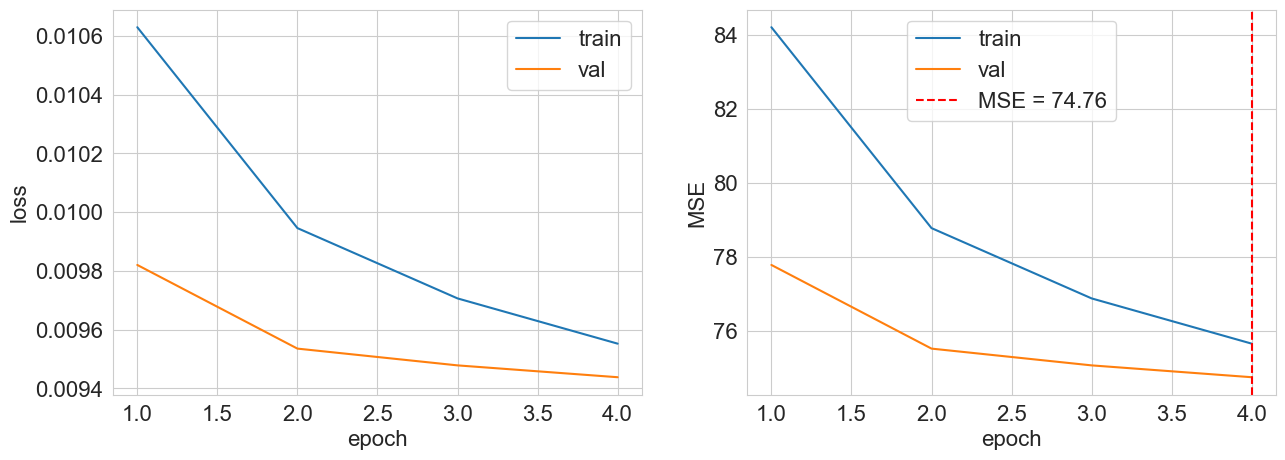

Validation MSE: 74.759


In [174]:
X_test_norm = ss.transform(X_test)
y_test_norm = normalize(y_test)

X_train_full_norm = np.concatenate((X_train_norm, X_val_norm), axis=0)
y_train_full_norm = np.concatenate((y_train_norm, y_val_norm), axis=0)

train_loader = mm.DataLoader(X_train_full_norm, y_train_full_norm.reshape(-1, 1), batch_size=32, shuffle=True)
test_loader = mm.DataLoader(X_test_norm, y_test_norm.reshape(-1, 1), batch_size=32, shuffle=False)

model = mm.Sequential(
    mm.Linear(90, 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 90),
    mm.BatchNormalization(90),
    mm.ReLU(),
    mm.Linear(90, 1),
    mm.Sigmoid()
)

optimizer = mm.Adam(model, lr=0.001)
criterion = mm.MSELoss()

t_mse, v_mse = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    test_loader,
    num_epochs = 4,
    verbose=True
)

Ничего себе, у меня еще есть время, тогда дообучаем пока val (на самом деле test, но я не буду уже менять названия на графиках) не станет лучше train, и то что получится - наша итоговая модель

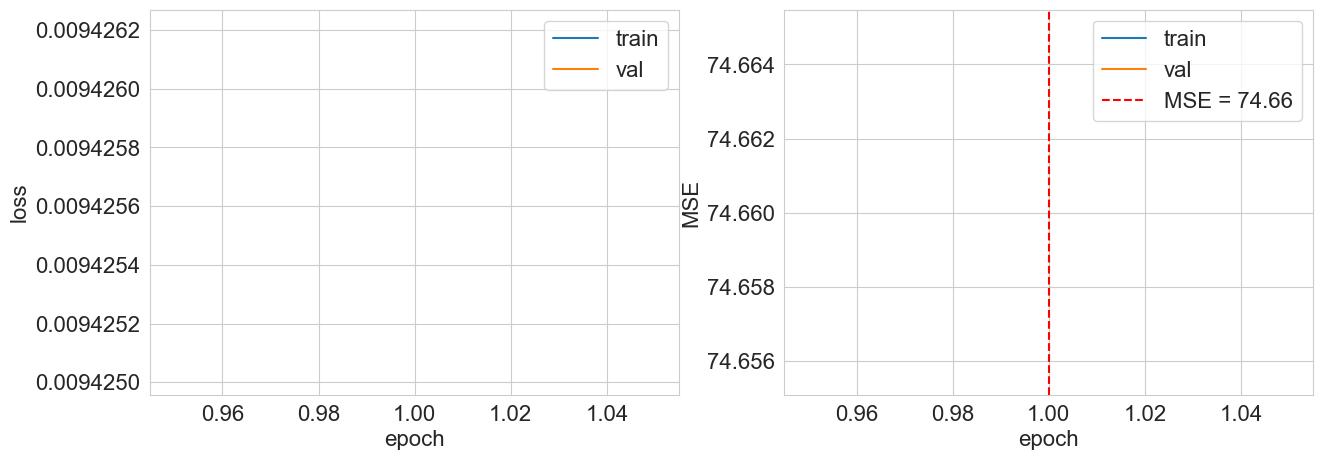

Validation MSE: 74.656


In [177]:
t_mse, v_mse = train_and_validate(
    model, 
    optimizer,
    criterion,
    metric,
    train_loader,
    test_loader,
    num_epochs = 1,
    verbose=True
)

In [179]:
print(t_mse, v_mse) # идеально, это наша модель 

[74.66500541894501] [74.65555951926275]


In [175]:
baseline_linreg_error

89.74966397222076

In [176]:
best_const_error

117.62580230734426

Мы сильно лучше бейзлайнов, что наверное неплохо. Хотя вся часть с подбором гиперпараметров в данном случае очень бесполезной оказалась.